In [1]:
import sys
import os as os
import numpy as np
try:
    import cPickle as pickle
except:
    import pickle as pkl

import scipy as scipy
import scipy.io as spio
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import signal
from scipy.signal import find_peaks
from scipy.ndimage import gaussian_filter1d
from scipy.io.matlab import mat_struct
import pickle
import random
random.seed(666)

def loadmat(filename):
    '''
    this function should be called instead of direct spio.loadmat
    as it cures the problem of not properly recovering python dictionaries
    from mat files. It calls the function check keys to cure all entries
    which are still mat-objects
    '''
    data = spio.loadmat(filename, struct_as_record=True, squeeze_me=True)
    return _check_keys(data)

def _check_keys(dict):
    '''
    checks if entries in dictionary are mat-objects. If yes
    todict is called to change them to nested dictionaries
    '''
    for key in dict:
        if isinstance(dict[key], scipy.io.matlab.mat_struct):
            dict[key] = _todict(dict[key])
    return dict        

def _todict(matobj):
    '''
    A recursive function which constructs from matobjects nested dictionaries
    '''
    dict = {}
    for strg in matobj._fieldnames:
        elem = matobj.__dict__[strg]
        if isinstance(elem, scipy.io.matlab.mat_struct):
            dict[strg] = _todict(elem)
        else:
            dict[strg] = elem
    return dict

In [3]:
import scipy.stats as stats

In [ ]:
# # load
# with open(save_path, 'rb') as f:
#     classifiers_results = pickle.load(f)
# classifiers_results

In [2]:
s = [45,46,11,13,14,19,20]
m = ['3C280','3C280','3C290','3C290','3C290','3C290','3C290']



## Morning analysis

### Accuracy

In [10]:
acc_ab_svm = []
acc_ab_bayes = []
acc_sbl_svm = []
acc_sbl_bayes = []

In [12]:
for i in range(len(s)):
    mouse = m[i]
    Session = s[i]
    with open(f'C:\\Users\\ebukina\\Desktop\\eva\\results\\models_a_b_bl\\S{Session}\\{mouse}_S{Session}_classifiers_results.pkl', 'rb') as f:
        classifiers_results = pickle.load(f)
        acc_ab_svm.append(classifiers_results['svm']['acc_ab'])
        acc_ab_bayes.append(classifiers_results['bayes']['acc_ab'])
        acc_sbl_svm.append(classifiers_results['svm']['acc_sb'])
        acc_sbl_bayes.append(classifiers_results['bayes']['acc_sb'])

In [13]:
acc_ab_svm = np.array(acc_ab_svm)
acc_ab_bayes = np.array(acc_ab_bayes)
acc_sbl_svm = np.array(acc_sbl_svm)
acc_sbl_bayes = np.array(acc_sbl_bayes)

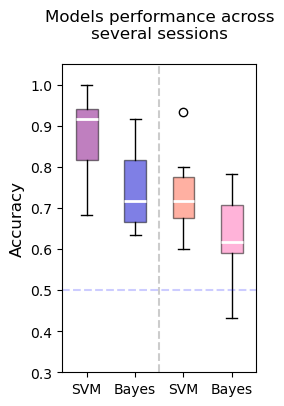

In [14]:
# Sample data
data = [acc_sbl_svm, acc_sbl_bayes, acc_ab_svm, acc_ab_bayes]
labels = ['SVM', 'Bayes', 'SVM', 'Bayes']
colors = ['#800080', '#0000CD', '#FF6347', '#FF69B4']

# Create the box plot
plt.figure(figsize=(2.5,4))
boxplot = plt.boxplot(data, patch_artist=True)

# Set the colors and transparency for the boxes
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.5)  # Set transparency level

# Change the color of the median lines
for median in boxplot['medians']:
    median.set_color('white')  # Change this to your preferred color
    median.set_linewidth(2)    # Optionally adjust the line width

# Add horizontal and vertical lines
plt.axhline(0.5, color='blue', linestyle='--', alpha=0.2)
plt.axvline(2.5, color='k', linestyle='--', alpha=0.2)

# Add titles and labels
plt.title('Models performance across\nseveral sessions\n')
plt.ylabel('Accuracy', fontsize=12)
plt.ylim(0.3, 1.05)
plt.xticks([1, 2, 3, 4], labels)

# Save the figure
plt.savefig('C:\\Users\\ebukina\\Desktop\\eva\\results\\models_a_b_bl\\acc_boxplots.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

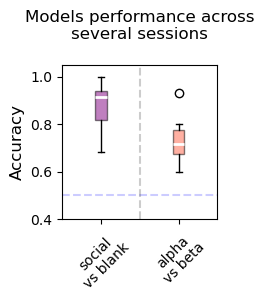

In [15]:
# Sample data
data = [acc_sbl_svm, acc_ab_svm]
labels = ['social\nvs blank', 'alpha\nvs beta']
colors = ['#800080', '#FF6347']

# Create the box plot
plt.figure(figsize=(2,2))
boxplot = plt.boxplot(data, patch_artist=True)

# Set the colors and transparency for the boxes
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.5)  # Set transparency level

# Change the color of the median lines
for median in boxplot['medians']:
    median.set_color('white')  # Change this to your preferred color
    median.set_linewidth(2)    # Optionally adjust the line width

# Add horizontal and vertical lines
plt.axhline(0.5, color='blue', linestyle='--', alpha=0.2)
plt.axvline(1.5, color='k', linestyle='--', alpha=0.2)

# Add titles and labels
plt.title('Models performance across\nseveral sessions\n')
plt.ylabel('Accuracy', fontsize=12)
plt.ylim(0.4, 1.05)
plt.xticks([1, 2], labels)
plt.xticks(rotation=45)

# Save the figure
plt.savefig('C:\\Users\\ebukina\\Desktop\\eva\\results\\models_a_b_bl\\svm_acc_boxplots.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

In [82]:
# Mann-Whitney U Test
stat, p = stats.mannwhitneyu(acc_sbl_svm, acc_ab_svm)
print(f"Mann-Whitney U Test: U={stat}, p={p}")

if p > 0.05:
    print("No significant difference between samples.")
else:
    print("Significant difference between samples.")

Mann-Whitney U Test: U=39.0, p=0.07284382284382285
No significant difference between samples.


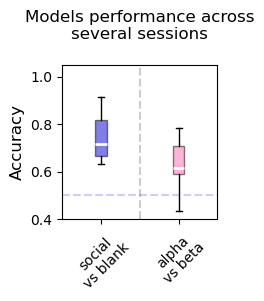

In [16]:
# Sample data
data = [acc_sbl_bayes, acc_ab_bayes]
labels = ['social\nvs blank', 'alpha\nvs beta']
colors = ['#0000CD', '#FF69B4']

# Create the box plot
plt.figure(figsize=(2,2))
boxplot = plt.boxplot(data, patch_artist=True)

# Set the colors and transparency for the boxes
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.5)  # Set transparency level

# Change the color of the median lines
for median in boxplot['medians']:
    median.set_color('white')  # Change this to your preferred color
    median.set_linewidth(2)    # Optionally adjust the line width

# Add horizontal and vertical lines
plt.axhline(0.5, color='blue', linestyle='--', alpha=0.2)
plt.axvline(1.5, color='k', linestyle='--', alpha=0.2)

# Add titles and labels
plt.title('Models performance across\nseveral sessions\n')
plt.ylabel('Accuracy', fontsize=12)
plt.ylim(0.4, 1.05)
plt.xticks([1, 2], labels)
plt.xticks(rotation=45)

# Save the figure
plt.savefig('C:\\Users\\ebukina\\Desktop\\eva\\results\\models_a_b_bl\\bayes_acc_boxplots.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

In [83]:
# Mann-Whitney U Test
stat, p = stats.mannwhitneyu(acc_sbl_bayes, acc_ab_bayes)
print(f"Mann-Whitney U Test: U={stat}, p={p}")

if p > 0.05:
    print("No significant difference between samples.")
else:
    print("Significant difference between samples.")

Mann-Whitney U Test: U=39.5, p=0.06333570382557177
No significant difference between samples.


In [72]:
nam = ['svm_sb', 'bayes_sb', 'svm_ab', 'bayes_ab']
for i,dat in enumerate(data):
    # Kolmogorov-Smirnov Test
    stat, p = stats.kstest(dat, 'norm')
    if p > 0.05:
        print(f"{nam[i]}: Distr is normal, p = {p:.3f}")
    else:
        print(f"{nam[i]}: Dist is NOT normal, p = {p:.3f}")

svm_sb: Dist is NOT normal, p = 0.000
bayes_sb: Dist is NOT normal, p = 0.001


**Kruskal-Wallis Test:** If the ANOVA assumptions (*normality, homogeneity of variances, independence of observations*) are not met, use the Kruskal-Wallis test, a non-parametric alternative that doesn’t assume normal distribution.

In [75]:
# Kruskal-Wallis test
h_statistic, p_value = stats.kruskal(data[0], data[1], data[2], data[3])
if p > 0.05:
    print(f"No difference, p = {p_value:.3f}")
else:
    print(f"There is a difference, p = {p_value:.3f}")

There is a difference, p = 0.015


**Post-Hoc Tests:** If you find significant differences with ANOVA or Kruskal-Wallis, use post-hoc tests to determine which specific groups differ.

- Tukey’s HSD (Honestly Significant Difference): For ANOVA, to compare all pairs of means.
- **Dunn’s Test:** For Kruskal-Wallis, to perform pairwise comparisons.


In [76]:
# conda install -c conda-forge scikit-posthocs : put it in command line!!!
import scikit_posthocs as sp

In [77]:
dff = np.concatenate(data)
groups = ['svm_sb']*len(data[0]) + ['bayes_sb']*len(data[1]) + ['svm_ab']*len(data[2]) + ['bayes_ab']*len(data[3])
df = pd.DataFrame({'value': dff, 'group': groups})

In [78]:
# Perform Dunn's test
dunn_results = sp.posthoc_dunn(df, val_col='value', group_col='group', p_adjust='bonferroni')
print(dunn_results)

          bayes_ab  bayes_sb    svm_ab    svm_sb
bayes_ab  1.000000  0.712034  1.000000  0.007311
bayes_sb  0.712034  1.000000  1.000000  0.564610
svm_ab    1.000000  1.000000  1.000000  0.383346
svm_sb    0.007311  0.564610  0.383346  1.000000


In [80]:
alpha = 0.5
dunn_results < alpha

,bayes_ab,bayes_sb,svm_ab,svm_sb
bayes_ab,False,False,False,True
bayes_sb,False,False,False,False
svm_ab,False,False,False,True
svm_sb,True,False,True,False


#### Significance of predictions

In [51]:
# classifiers_results['svm'] = {'acc_ab':acc_svm_ab, 'acc_sh_ab':acc_sh_ab, 'pval_ab':p_value_ab, 
#                               acc_sb':acc_svm_sb, 'acc_sh_sb':acc_sh_sb, 'pval_sb':p_value_sb}

# classifiers_results['bayes'] = {'acc_ab':acc_bayes_ab, 'acc_sh_ab':acc_sh_bayes_ab,'pval_ab':p_value_bayes_ab,
                                # 'acc_sb':acc_bayes_sb, 'acc_sh_sb':acc_sh_bayes_sb, 'pval_sb':p_value_bayes_sb}

In [17]:
p_ab_svm = []
p_ab_bayes = []
p_sbl_svm = []
p_sbl_bayes = []

In [18]:
for i in range(len(s)):
    mouse = m[i]
    Session = s[i]
    with open(f'C:\\Users\\ebukina\\Desktop\\eva\\results\\models_a_b_bl\\S{Session}\\{mouse}_S{Session}_classifiers_results.pkl', 'rb') as f:
        classifiers_results = pickle.load(f)
        p_ab_svm.append(classifiers_results['svm']['pval_ab'])
        p_ab_bayes.append(classifiers_results['bayes']['pval_ab'])
        p_sbl_svm.append(classifiers_results['svm']['pval_sb'])
        p_sbl_bayes.append(classifiers_results['bayes']['pval_sb'])

In [19]:
p_ab_svm = np.array(p_ab_svm)
p_ab_bayes = np.array(p_ab_bayes)
p_sbl_svm = np.array(p_sbl_svm)
p_sbl_bayes = np.array(p_sbl_bayes)

In [20]:
np.sum(p_ab_svm<0.05)

6

In [21]:
whats = ['p_ab_svm', 'p_ab_bayes', 'p_sbl_svm', 'p_sbl_bayes']
colors = [ '#FF6347', '#FF69B4', '#800080', '#0000CD'] # '#808080' - grey
sets = [p_ab_svm, p_ab_bayes, p_sbl_svm, p_sbl_bayes]

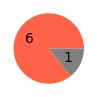

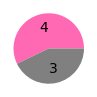

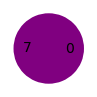

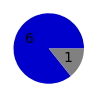

In [22]:
for i, set in enumerate(sets):
    what = whats[i]
    plt.figure(figsize=(1,1))
    # Data to plot
    sizes = [np.sum(set<0.05),(7-np.sum(set<0.05))]
    colorss = [colors[i], '#808080']

    def absolute_value(val):
        a  = int(val/100.*sum(sizes))
        return a

    # Plot
    plt.pie(sizes, autopct=absolute_value, colors=colorss)

    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.savefig(f'C:\\Users\\ebukina\\Desktop\\eva\\results\\models_a_b_bl\\pie_{what}.png', dpi=300, bbox_inches='tight')
    plt.show()

### MD summary

In [24]:
MD_matrices = []
for i in range(len(s)):
    mouse = m[i]
    Session = s[i]
    with open(f'C:\\Users\\ebukina\\Desktop\\eva\\results\\populational_anal\\{mouse}_S{Session}_MD_matrix.pkl', 'rb') as f:
        MD_matrix = pickle.load(f)
        MD_matrices.append(MD_matrix)

In [25]:
MD_npoke_all_sessions = np.zeros((7,3,3))
for ses in range(len(MD_matrices)):
    MD_npoke_all_sessions[ses,:,:] = MD_matrices[ses]

In [26]:
MD_npoke_all_sessions.shape

(7, 3, 3)

In [27]:
MD_npoke_mean = np.mean(MD_npoke_all_sessions, axis=0)
MD_npoke_mean

array([[0.75260832, 0.53630309, 1.45055169],
       [       nan, 0.63860913, 1.69907735],
       [       nan,        nan, 1.19104733]])

In [28]:
import seaborn as sns
import math

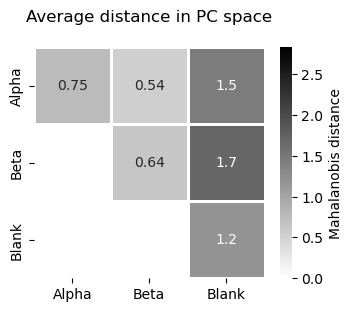

In [29]:
plt.figure(figsize=(4, 3))

labels = ['Alpha', 'Beta', 'Blank']

# Create the heatmap
sns.heatmap(MD_npoke_mean, annot=MD_npoke_mean, cmap='binary', cbar_kws={'label': 'Mahalanobis distance'}, linewidths=1, linecolor='white', square=True, vmin=0, vmax=math.sqrt(8))

# # Customize the heatmap
plt.xticks(ticks=np.arange(len(labels))+0.5, labels=labels, rotation=0)
plt.yticks(ticks=np.arange(len(labels))+0.5, labels=labels, rotation=90)

plt.title('Average distance in PC space\n')
plt.savefig(f'C:\\Users\\ebukina\\Desktop\\eva\\results\\aaa_bbb\\mean_MD_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

In [30]:
seq = ['bac', 'abc', 'bac', 'bac', 'abc', 'bac','bac']

In [62]:
MD23_all = []
MD13_all = []
MD12_all = []

for ses in range(len(s)):
    MD12_all.append(MD_npoke_all_sessions[ses,0,1])
    if seq[i]=='bac':
        MD23_all.append(MD_npoke_all_sessions[ses,0,2])
        MD13_all.append(MD_npoke_all_sessions[ses,1,2])
    else:
        MD23_all.append(MD_npoke_all_sessions[ses,1,2])
        MD13_all.append(MD_npoke_all_sessions[ses,0,2])

In [63]:
# took from matrices manually
a_23 = 0.37
a_13 = 0.97
a_12 =0.71
b_23 = 0.22
b_13 = 0.57
b_12 = 0.36

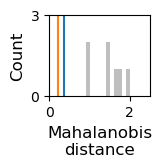

In [105]:
plt.figure(figsize=(1.3,1.05))
bin_edges = np.arange(np.min(np.array(MD23_all)), np.max(np.array(MD23_all))+0.1, 0.1)
plt.hist(MD23_all, alpha=0.5, bins=bin_edges, color='#808080')
plt.ylim(0,3)
plt.xlim(0,2.5)
plt.axvline(a_23,color='#1F77B4')
plt.axvline(b_23,color='#FF8113')
plt.xlabel('Mahalanobis\ndistance',  fontsize=12)
plt.ylabel('Count',  fontsize=12)
plt.yticks([0,3])
plt.tight_layout
plt.savefig(f'C:\\Users\\ebukina\\Desktop\\eva\\results\\aaa_bbb\\MD13_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

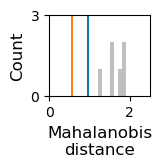

In [104]:
plt.figure(figsize=(1.3,1.05))
bin_edges = np.arange(np.min(np.array(MD23_all)), np.max(np.array(MD23_all))+0.1, 0.1)
plt.hist(MD13_all, alpha=0.5, bins=bin_edges, color='#808080')
plt.ylim(0,3)
plt.xlim(0,2.5)
plt.axvline(a_13,color='#1F77B4')
plt.axvline(b_13,color='#FF8113')
plt.xlabel('Mahalanobis\ndistance',  fontsize=12)
plt.ylabel('Count',  fontsize=12)
plt.yticks([0,3])
plt.tight_layout
plt.savefig(f'C:\\Users\\ebukina\\Desktop\\eva\\results\\aaa_bbb\\MD23_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

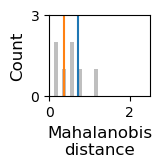

In [106]:
plt.figure(figsize=(1.3,1.05))
bin_edges = np.arange(np.min(np.array(MD12_all)), np.max(np.array(MD12_all))+0.1, 0.1)
plt.hist(MD12_all, alpha=0.5, bins=bin_edges, color='#808080')
plt.ylim(0,3)
plt.xlim(0,2.5)
plt.axvline(a_12,color='#1F77B4')
plt.axvline(b_12,color='#FF8113')
plt.xlabel('Mahalanobis\ndistance',  fontsize=12)
plt.ylabel('Count',  fontsize=12)
plt.yticks([0,3])
plt.tight_layout
plt.savefig(f'C:\\Users\\ebukina\\Desktop\\eva\\results\\aaa_bbb\\MD12_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

### Surprize

In [5]:
s = np.array([45,46,11,13,14,19,20])
m = ['3C280','3C280','3C290','3C290','3C290','3C290','3C290']

In [6]:
i_d_results_all = []
for i in range(len(s)):
    mouse = m[i]
    Session = s[i]
    with open(f'C:\\Users\\ebukina\\Desktop\\eva\\results\\populational_anal\\{mouse}_S{Session}_surprize.pkl', 'rb') as f:
        i_d_results = pickle.load(f)
        i_d_results_all.append(i_d_results)

In [7]:
PSTH_dic_all = []
for i in range(len(s)):
    mouse = m[i]
    Session = s[i]
    with open(f'C:\\Users\\ebukina\\Desktop\\eva\\results\\populational_anal\\{mouse}_S{Session}_PSTH_dic.pkl', 'rb') as f:
        PSTH_dic = pickle.load(f)
        PSTH_dic_all.append(PSTH_dic)

In [8]:
# session 11
ses=11
ses_idx = np.where(s==ses)[0][0]

n_cells = len(PSTH_dic_all[ses_idx][1]['Pi_poi'])
n_cells

40

In [329]:
# data

{'i': {'only_in_beta': 1,
  'only_in_alpha': 0,
  'only_in_blank': 1,
  'in_beta_and_alpha': 1,
  'in_alpha_and_blank': 1,
  'in_beta_and_blank': 0,
  'in_all_three': 0},
 'd': {'only_in_beta': 0,
  'only_in_alpha': 3,
  'only_in_blank': 1,
  'in_beta_and_alpha': 4,
  'in_alpha_and_blank': 3,
  'in_beta_and_blank': 4,
  'in_all_three': 5}}

In [331]:
color_map = {
    'only_in_beta': '#FF8113',
    'only_in_alpha': '#1F77B4',
    'only_in_blank': 'green',
    'in_beta_and_alpha': '#d15c73',
    'in_alpha_and_beta': '#d15c73',
    'in_alpha_and_blank': '#137b6c',
    'in_beta_and_blank': '#80800a',
    'in_all_three': 'yellow',
    'others': 'gray'
}

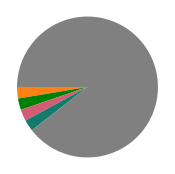

In [351]:
n_cells = 40-2
data = i_d_results_all[ses_idx]['i']

classified_cells = sum(data.values())
unclassified_cells = n_cells - classified_cells

# Add 'others' category
data['others'] = unclassified_cells

# Calculate percentages
sizes = [value / n_cells * 100 for value in data.values()]
colors = [color_map[label] for label in labels]

# Plot pie chart
fig, ax = plt.subplots(figsize=(2,2))
ax.pie(sizes, colors=colors, startangle=180)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.savefig(f'C:\\Users\\ebukina\\Desktop\\eva\\results\\surprize\\S11_pie_i.png', dpi=300, bbox_inches='tight')
# Display the plot
plt.show()

In [341]:
sizes

[2.631578947368421,
 0.0,
 2.631578947368421,
 2.631578947368421,
 2.631578947368421,
 0.0,
 0.0,
 89.47368421052632]

[0.0, 7.894736842105263, 2.631578947368421, 10.526315789473683, 7.894736842105263, 10.526315789473683, 13.157894736842104, 47.368421052631575]


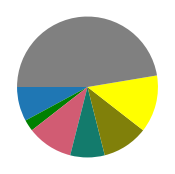

In [353]:
n_cells = 40-2
data = i_d_results_all[ses_idx]['d']

classified_cells = sum(data.values())
unclassified_cells = n_cells - classified_cells

# Add 'others' category
data['others'] = unclassified_cells

# Calculate percentages
sizes = [value / n_cells * 100 for value in data.values()]
colors = [color_map[label] for label in labels]
print(sizes)

# Plot pie chart
fig, ax = plt.subplots(figsize=(2,2))
ax.pie(sizes, colors=colors, startangle=180)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.savefig(f'C:\\Users\\ebukina\\Desktop\\eva\\results\\surprize\\S11_pie_d.png', dpi=300, bbox_inches='tight')
# Display the plot
plt.show()

In [349]:
sizes

[0.0,
 7.894736842105263,
 2.631578947368421,
 10.526315789473683,
 7.894736842105263,
 10.526315789473683,
 13.157894736842104,
 47.368421052631575]

all sessions

In [9]:
all_i = np.zeros(8)
all_d = np.zeros(8)

for ses in range(len(s)):
    data_i = i_d_results_all[ses]['i']
    data_d = i_d_results_all[ses]['d']

    all_i[0] += data_i['only_in_alpha']
    all_i[1] += data_i['only_in_beta']
    all_i[2] += data_i['only_in_blank']
    try:
        all_i[3] += data_i['in_beta_and_alpha']
    except:
        all_i[3] += data_i['in_alpha_and_beta']
    all_i[4] += data_i['in_alpha_and_blank']
    all_i[5] += data_i['in_beta_and_blank']
    all_i[6] += data_i['in_all_three']
    all_i[7] += len(PSTH_dic_all[ses][1]['Pi_poi'])

    all_d[0] += data_d['only_in_alpha']
    all_d[1] += data_d['only_in_beta']
    all_d[2] += data_d['only_in_blank']
    try:
        all_d[3] += data_d['in_beta_and_alpha']
    except:
        all_d[3] += data_d['in_alpha_and_beta']
    all_d[4] += data_d['in_alpha_and_blank']
    all_d[5] += data_d['in_beta_and_blank']
    all_d[6] += data_d['in_all_three']
    all_d[7] += len(PSTH_dic_all[ses][1]['Pi_poi'])


In [10]:
data_all_i = {'only_in_alpha': all_i[0],
  'only_in_beta': all_i[1],
  'only_in_blank': all_i[2],
  'in_beta_and_alpha': all_i[3],
  'in_alpha_and_blank': all_i[4],
  'in_beta_and_blank': all_i[5],
  'in_all_three': all_i[6]}

data_all_d = {'only_in_alpha': all_d[0],
  'only_in_beta': all_d[1],
  'only_in_blank': all_d[2],
  'in_beta_and_alpha': all_d[3],
  'in_alpha_and_blank': all_d[4],
  'in_beta_and_blank': all_d[5],
  'in_all_three': all_d[6]}

n_cells = all_i[-1]-4

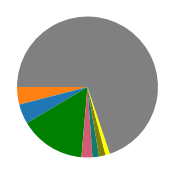

In [356]:
data = data_all_i

classified_cells = sum(data.values())
unclassified_cells = n_cells - classified_cells

# Add 'others' category
data['others'] = unclassified_cells

# Calculate percentages
sizes = [value / n_cells * 100 for value in data.values()]
colors = [color_map[label] for label in labels]

# Plot pie chart
fig, ax = plt.subplots(figsize=(2,2))
ax.pie(sizes, colors=colors, startangle=180)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.savefig(f'C:\\Users\\ebukina\\Desktop\\eva\\results\\surprize\\all_pie_i.png', dpi=300, bbox_inches='tight')
# Display the plot
plt.show()

In [357]:
sizes

[4.0201005025125625,
 4.522613065326634,
 15.07537688442211,
 2.512562814070352,
 1.507537688442211,
 1.507537688442211,
 1.0050251256281406,
 69.84924623115577]

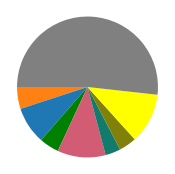

In [358]:
data = data_all_d

classified_cells = sum(data.values())
unclassified_cells = n_cells - classified_cells

# Add 'others' category
data['others'] = unclassified_cells

# Calculate percentages
sizes = [value / n_cells * 100 for value in data.values()]
colors = [color_map[label] for label in labels]

# Plot pie chart
fig, ax = plt.subplots(figsize=(2,2))
ax.pie(sizes, colors=colors, startangle=180)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.savefig(f'C:\\Users\\ebukina\\Desktop\\eva\\results\\surprize\\all_pie_d.png', dpi=300, bbox_inches='tight')
# Display the plot
plt.show()

In [359]:
sizes

[5.025125628140704,
 8.542713567839195,
 4.522613065326634,
 11.055276381909549,
 3.5175879396984926,
 4.0201005025125625,
 11.557788944723619,
 51.75879396984925]

In [50]:
data_all_i

{'only_in_alpha': 8.0,
 'only_in_beta': 9.0,
 'only_in_blank': 30.0,
 'in_beta_and_alpha': 5.0,
 'in_alpha_and_blank': 3.0,
 'in_beta_and_blank': 3.0,
 'in_all_three': 2.0}

In [11]:
# pyr, inter
s11 = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1]])

s45 = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0]])

s46 = np.array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1]])

s13 = np.array([[1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1],
       [0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0]])

s14 = np.array([[0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1],
       [1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]])

s19 = np.array([[0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0],
       [1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1]])

s20 = np.array([[1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1]])

In [12]:
n_cells_11 = s11.shape[1]
n_cells_11_fr = n_cells_11/100

In [13]:
n_cells = 0
for ses in [s45,s46,s11,s13,s14,s19,s20]:
    n_cells+=ses.shape[1]
n_cells

203

In [14]:
n_cells_fr = n_cells/100

In [15]:
i_sum = data_all_i['in_beta_and_alpha']+data_all_i['only_in_alpha']+data_all_i['only_in_beta']
d_sum = data_all_d['in_beta_and_alpha']+data_all_d['only_in_alpha']+data_all_d['only_in_beta']
id_sum = i_sum+d_sum
id_sum/n_cells_fr

34.975369458128085

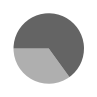

In [16]:
# Data to plot
sizes = [id_sum, n_cells-id_sum]
colors = ['#AFAFAF', '#646464']


# Plot
plt.figure(figsize=(1,1))
plt.pie(sizes,  colors=colors, startangle=180)

plt.axis('equal')
plt.savefig(f'C:\\Users\\ebukina\\Desktop\\eva\\results\\surprize\\pie_modulated_by_urine.png', dpi=300, bbox_inches='tight')
plt.show()

C:\Users\ebukina\AppData\Local\Temp\ipykernel_13424\3142460354.py:32: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


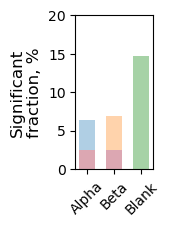

In [71]:
# activated
categories = ['Alpha', 'Beta', 'Blank']
sub_categories = ['ab', 'a', 'b', 'bl']
values = np.array([[data_all_i['in_beta_and_alpha']/n_cells_fr, data_all_i['in_beta_and_alpha']/n_cells_fr, 0], # lowest raw from alpha to beta
                   [data_all_i['only_in_alpha']/n_cells_fr, 0, 0],
                   [0, data_all_i['only_in_beta']/n_cells_fr, 0],
                   [0,0,data_all_i['only_in_blank']/n_cells_fr]])

colors = ['#DCA7B2', '#B0CFE4', '#FFD3AC', '#A6D2A6']
# colors = ['green', '#FF8113','#1F77B4','#d15c73']
# Positions of the bars on the x-axis
x = np.arange(len(categories))
bar_width =0.6

# Create the figure and axis
fig, ax = plt.subplots(figsize=(1,2))

# Plot each sub-category
for i in range(values.shape[0]):
    if i == 0:
        ax.bar(x, values[i], width=bar_width, label=sub_categories[i], color=colors[i])
    else:
        ax.bar(x, values[i], width=bar_width, bottom=np.sum(values[:i], axis=0), label=sub_categories[i], color=colors[i])

# Add labels and title
ax.set_ylabel('Significant\nfraction, %',  fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(categories)
# ax.legend()
plt.xticks(rotation=45)
plt.ylim(0,20)
plt.tight_layout()
plt.savefig(f'C:\\Users\\ebukina\\Desktop\\eva\\results\\surprize\\bar_i.png', dpi=300, bbox_inches='tight')
# Show the plot
plt.show()

C:\Users\ebukina\AppData\Local\Temp\ipykernel_13424\2894787580.py:32: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


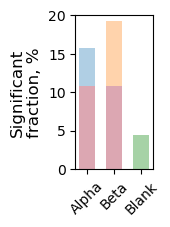

In [70]:
# activated
categories = ['Alpha', 'Beta', 'Blank']
sub_categories = ['ab', 'a', 'b', 'bl']
values = np.array([[data_all_d['in_beta_and_alpha']/n_cells_fr, data_all_d['in_beta_and_alpha']/n_cells_fr, 0], # lowest raw from alpha to beta
                   [data_all_d['only_in_alpha']/n_cells_fr, 0, 0],
                   [0, data_all_d['only_in_beta']/n_cells_fr, 0],
                   [0,0,data_all_d['only_in_blank']/n_cells_fr]])

colors = ['#DCA7B2', '#B0CFE4', '#FFD3AC', '#A6D2A6']
# colors = ['green', '#FF8113','#1F77B4','#d15c73']
# Positions of the bars on the x-axis
x = np.arange(len(categories))
bar_width =0.6

# Create the figure and axis
fig, ax = plt.subplots(figsize=(1,2))

# Plot each sub-category
for i in range(values.shape[0]):
    if i == 0:
        ax.bar(x, values[i], width=bar_width, label=sub_categories[i], color=colors[i])
    else:
        ax.bar(x, values[i], width=bar_width, bottom=np.sum(values[:i], axis=0), label=sub_categories[i], color=colors[i])

# Add labels and title
ax.set_ylabel('Significant\nfraction, %',  fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(categories)
# ax.legend()
plt.xticks(rotation=45)
plt.ylim(0,20)
plt.tight_layout()
plt.savefig(f'C:\\Users\\ebukina\\Desktop\\eva\\results\\surprize\\bar_d.png', dpi=300, bbox_inches='tight')
# Show the plot
plt.show()

In [46]:
s11_i = i_d_results_all[ses_idx]['i']
s11_i

{'only_in_beta': 1,
 'only_in_alpha': 0,
 'only_in_blank': 1,
 'in_beta_and_alpha': 1,
 'in_alpha_and_blank': 1,
 'in_beta_and_blank': 0,
 'in_all_three': 0}

In [47]:
s11_d = i_d_results_all[ses_idx]['d']
s11_d

{'only_in_beta': 0,
 'only_in_alpha': 3,
 'only_in_blank': 1,
 'in_beta_and_alpha': 4,
 'in_alpha_and_blank': 3,
 'in_beta_and_blank': 4,
 'in_all_three': 5}

C:\Users\ebukina\AppData\Local\Temp\ipykernel_13424\1286635411.py:34: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


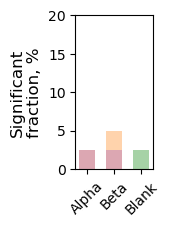

In [69]:
# activated
s11_x = s11_i

categories = ['Alpha', 'Beta', 'Blank']
sub_categories = ['ab', 'a', 'b', 'bl']
values = np.array([[s11_x['in_beta_and_alpha']/n_cells_11_fr, s11_x['in_beta_and_alpha']/n_cells_11_fr, 0], # lowest raw from alpha to beta
                   [s11_x['only_in_alpha']/n_cells_11_fr, 0, 0],
                   [0, s11_x['only_in_beta']/n_cells_11_fr, 0],
                   [0,0,s11_x['only_in_blank']/n_cells_11_fr]])

colors = ['#DCA7B2', '#B0CFE4', '#FFD3AC', '#A6D2A6']
# colors = ['green', '#FF8113','#1F77B4','#d15c73']
# Positions of the bars on the x-axis
x = np.arange(len(categories))
bar_width =0.6

# Create the figure and axis
fig, ax = plt.subplots(figsize=(1,2))

# Plot each sub-category
for i in range(values.shape[0]):
    if i == 0:
        ax.bar(x, values[i], width=bar_width, label=sub_categories[i], color=colors[i])
    else:
        ax.bar(x, values[i], width=bar_width, bottom=np.sum(values[:i], axis=0), label=sub_categories[i], color=colors[i])

# Add labels and title
ax.set_ylabel('Significant\nfraction, %',  fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(categories)
# ax.legend()
plt.xticks(rotation=45)
plt.ylim(0,20)
plt.tight_layout()
plt.savefig(f'C:\\Users\\ebukina\\Desktop\\eva\\results\\surprize\\bar_i_s11.png', dpi=300, bbox_inches='tight')
# Show the plot
plt.show()

C:\Users\ebukina\AppData\Local\Temp\ipykernel_13424\2830179633.py:34: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


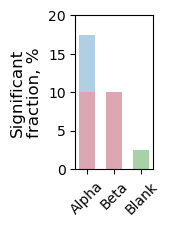

In [67]:
# activated
s11_x = s11_d

categories = ['Alpha', 'Beta', 'Blank']
sub_categories = ['ab', 'a', 'b', 'bl']
values = np.array([[s11_x['in_beta_and_alpha']/n_cells_11_fr, s11_x['in_beta_and_alpha']/n_cells_11_fr, 0], # lowest raw from alpha to beta
                   [s11_x['only_in_alpha']/n_cells_11_fr, 0, 0],
                   [0, s11_x['only_in_beta']/n_cells_11_fr, 0],
                   [0,0,s11_x['only_in_blank']/n_cells_11_fr]])

colors = ['#DCA7B2', '#B0CFE4', '#FFD3AC', '#A6D2A6']
# colors = ['green', '#FF8113','#1F77B4','#d15c73']
# Positions of the bars on the x-axis
x = np.arange(len(categories))
bar_width =0.6

# Create the figure and axis
fig, ax = plt.subplots(figsize=(1,2))

# Plot each sub-category
for i in range(values.shape[0]):
    if i == 0:
        ax.bar(x, values[i], width=bar_width, label=sub_categories[i], color=colors[i])
    else:
        ax.bar(x, values[i], width=bar_width, bottom=np.sum(values[:i], axis=0), label=sub_categories[i], color=colors[i])

# Add labels and title
ax.set_ylabel('Significant\nfraction, %',  fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(categories)
# ax.legend()
plt.xticks(rotation=45)
plt.ylim(0,20)
plt.tight_layout()
plt.savefig(f'C:\\Users\\ebukina\\Desktop\\eva\\results\\surprize\\bar_d_s11.png', dpi=300, bbox_inches='tight')
# Show the plot
plt.show()

### classification

In [361]:
meta = {}
meta[45] = {'mouse':'3C280', 'ks':'Kilosort_2024-04-12_162032', 'del_units':[594], 'vis_mice':np.array(['nan', 'beta', 'alpha'])}
meta[46] = {'mouse':'3C280', 'ks':'Kilosort_2024-04-12_180855', 'del_units':None, 'vis_mice':np.array(['nan', 'alpha', 'beta'])}
meta[11] = {'mouse':'3C290', 'ks':'Kilosort_2024-05-06_154258', 'del_units':[847, 835], 'vis_mice':np.array(['nan', 'beta', 'alpha'])}
meta[13] = {'mouse':'3C290', 'ks':'Kilosort_2024-05-14_120055', 'del_units':None, 'vis_mice':np.array(['nan', 'beta', 'alpha'])}
meta[14] = {'mouse':'3C290', 'ks':'Kilosort_2024-05-14_122629', 'del_units':None, 'vis_mice':np.array(['nan', 'beta', 'alpha'])}
meta[19] = {'mouse':'3C290', 'ks':'Kilosort_2024-05-14_140410', 'del_units':None, 'vis_mice':np.array(['nan', 'beta', 'alpha'])}
meta[20] = {'mouse':'3C290', 'ks':'Kilosort_2024-05-15_110539', 'del_units':[33], 'vis_mice':np.array(['nan', 'beta', 'alpha'])}

In [400]:
Session = 20
mouse = meta[Session]['mouse']
vis_mice = meta[Session]['vis_mice']
vis_mice = list(vis_mice)
vis_mice.append('blank')
vis_mice = vis_mice[1:]

In [401]:
matfile =  f'L:\\everyone\\sharedDATA\\ProcessedDATA\\{mouse}\\{mouse}_S{Session}\\{mouse}_S{Session}.spikes.cellinfo.mat'
pyr_inter = loadmat(matfile)

In [402]:
arr = pyr_inter['spikes']['CellClassifier']
arr

array(array((array([1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0], dtype=uint8), array([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1], dtype=uint8), array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=uint8), array([0.96603774, 0.94814815, 0.91428571, 0.91428571, 0.96603774,
       0.98461538, 0.88275862, 0.81269841, 0.91428571, 1.04489796,
       0.86779661, 1.24878049, 0.91428571, 0.93090909, 0.98461538,
       0.74202899, 0.8       ]), array([0.6 , 0.6 , 0.65, 0.6 , 0.55, 0.5 , 0.55, 0.25, 0.65, 0.7 , 0.25,
       0.5 , 0.65, 0.6 , 0.65, 0.25, 0.25]), array([3.1508117 , 3.61061872, 3.55517881, 3.82618361, 3.04485181,
       2.26070407, 3.6644336 , 4.06106169, 4.05825378, 2.74445021,
       4.16405775, 1.81780219, 4.17569528, 3.44214133, 3.39934252,
       2.27888095, 3.43038811])),
      dtype=[('Piramidal', 'O'), ('InterneuronUnits', 'O'), ('Classed', 'O'), ('SpkW', 'O'), ('TtoPdur', 'O'), ('RatioTtoP', 'O')]),
      dtype=object)

manually copy-pasted from each session

In [406]:
# pyr, inter
s11 = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1]])

s45 = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0]])

s46 = np.array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1]])

s13 = np.array([[1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1],
       [0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0]])

s14 = np.array([[0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1],
       [1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]])

s19 = np.array([[0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0],
       [1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1]])

s20 = np.array([[1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1]])

In [411]:
pyr_inter_matrix = np.zeros((len(s), 3)) #pyr, inter,not classified
all_ses_data = [s45,s46,s11,s13,s14,s19,s20]

for i,ses in enumerate(all_ses_data):
    pyr_inter_matrix[i,0] = np.sum(ses[0])
    pyr_inter_matrix[i,1] = np.sum(ses[1])
    pyr_inter_matrix[i,2] = len(ses[0])-(np.sum(ses[0])+ np.sum(ses[1]))

pyr_inter_matrix

array([[ 8., 16.,  0.],
       [ 8., 23.,  0.],
       [27., 13.,  0.],
       [30., 11.,  0.],
       [26.,  6.,  0.],
       [12.,  6.,  0.],
       [12.,  5.,  0.]])

In [412]:
total_pyr_inter = np.sum(pyr_inter_matrix, axis=0)
total_pyr_inter

array([123.,  80.,   0.])

In [414]:
s11_pyr_inter = pyr_inter_matrix[2]
s11_pyr_inter

array([27., 13.,  0.])

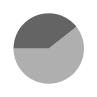

In [421]:
# Data to plot
sizes = [123, 80]
colors = ['#AFAFAF', '#646464']


# Plot
plt.figure(figsize=(1,1))
plt.pie(sizes,  colors=colors, startangle=180)

plt.axis('equal')
plt.savefig(f'C:\\Users\\ebukina\\Desktop\\eva\\results\\surprize\\all_pyr_inter.png', dpi=300, bbox_inches='tight')
plt.show()

In [418]:
total_pyr_inter*100/np.sum(total_pyr_inter)

array([60.591133, 39.408867,  0.      ])

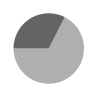

In [420]:
sizes = [27., 13]
colors = ['#AFAFAF', '#646464']


# Plot
plt.figure(figsize=(1,1))
plt.pie(sizes,  colors=colors, startangle=180)

plt.axis('equal')
plt.savefig(f'C:\\Users\\ebukina\\Desktop\\eva\\results\\surprize\\s11_pyr_inter.png', dpi=300, bbox_inches='tight')
plt.show()

In [419]:
s11_pyr_inter*100/np.sum(s11_pyr_inter)

array([67.5, 32.5,  0. ])

## Take out

In [47]:
take_out_neurons = {}
take_out_trials = {}

In [48]:
SVM_sbl = []
bayes_sbl = []
SVM_ab = []
bayes_ab = []

for i in range(len(s)):
    mouse = m[i]
    Session = s[i]
    with open(f'C:\\Users\\ebukina\\Desktop\\eva\\results\\taking_out_analysis\\S{Session}\\{mouse}_S{Session}_classifiers_results_takeout.pkl', 'rb') as f:
        takeout_accuracy_dic = pickle.load(f)
        SVM_sbl.append(takeout_accuracy_dic['SVM_sbl'])
        bayes_sbl.append(takeout_accuracy_dic['bayes_sbl'])
        SVM_ab.append(takeout_accuracy_dic['SVM_ab'])
        bayes_ab.append(takeout_accuracy_dic['bayes_ab'])

take_out_neurons['SVM_sbl'] = SVM_sbl
take_out_neurons['bayes_sbl'] = bayes_sbl
take_out_neurons['SVM_ab'] = SVM_ab
take_out_neurons['bayes_ab'] = bayes_ab


In [49]:
SVM_sbl = []
bayes_sbl = []
SVM_ab = []
bayes_ab = []

for i in range(len(s)):
    mouse = m[i]
    Session = s[i]
    with open(f'C:\\Users\\ebukina\\Desktop\\eva\\results\\taking_out_analysis\\S{Session}\\{mouse}_S{Session}_classifiers_results_takeout_trials.pkl', 'rb') as f:
        takeout_accuracy_dic = pickle.load(f)
        SVM_sbl.append(takeout_accuracy_dic['SVM_sbl'])
        bayes_sbl.append(takeout_accuracy_dic['bayes_sbl'])
        SVM_ab.append(takeout_accuracy_dic['SVM_ab'])
        bayes_ab.append(takeout_accuracy_dic['bayes_ab'])

take_out_trials['SVM_sbl'] = SVM_sbl
take_out_trials['bayes_sbl'] = bayes_sbl
take_out_trials['SVM_ab'] = SVM_ab
take_out_trials['bayes_ab'] = bayes_ab

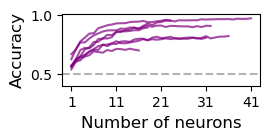

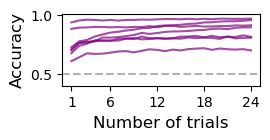

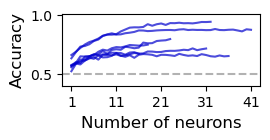

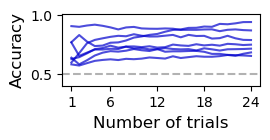

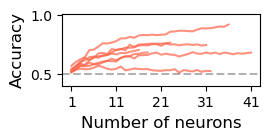

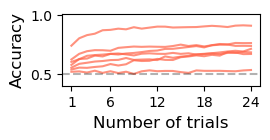

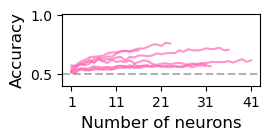

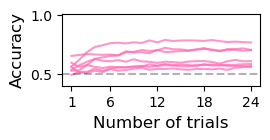

In [50]:
model_data_list = ['SVM_sbl', 'bayes_sbl', 'SVM_ab', 'bayes_ab']
colors = ['#800080', '#0000CD', '#FF6347', '#FF69B4']

for mew in range(len(model_data_list)):


    model_data=model_data_list[mew]
    color = colors[mew]

    all_ses_list = []
    for i in range(len(s)):
        nonflipped = np.zeros(len(take_out_neurons[model_data][i].keys()))
        for n in take_out_neurons[model_data][i].keys():
            mean_acc = np.mean(np.array(take_out_neurons[model_data][i][n]))
            nonflipped[n] = mean_acc
        flipped = np.flip(nonflipped)
        all_ses_list.append(flipped)

    # plt.figure(figsize=(2.8,2.5)) 
    plt.figure(figsize=(2.8,1.5)) 
    for i in range(len(s)):
        plt.plot(all_ses_list[i], color=color, alpha=0.7)
    plt.xlabel('Number of neurons',  fontsize=12)
    plt.ylabel('Accuracy',  fontsize=12)
    # plt.title("Model performance with different\nnumbers of neurons")
    plt.xticks(np.arange(0,41,10), labels=np.arange(1,42,10), fontsize=10)
    plt.axhline(0.5, color='k', linestyle='--', alpha=0.3)
    # plt.legend()
    # plt.xticks(fontsize=8)
    # plt.yticks(fontsize=8)
    plt.ylim(0.4,1.01)
    plt.tight_layout()
    plt.savefig(f'C:\\Users\\ebukina\\Desktop\\eva\\results\\taking_out_analysis\\neurons_{model_data}.png', dpi=300, bbox_inches='tight')
    plt.show()

    all_ses_list = []
    for i in range(len(s)):
        nonflipped = np.zeros(len(take_out_trials[model_data][i].keys()))
        for n in take_out_trials[model_data][i].keys():
            mean_acc = np.mean(np.array(take_out_trials[model_data][i][n]))
            nonflipped[n] = mean_acc
        flipped = np.flip(nonflipped)
        all_ses_list.append(flipped)

    plt.figure(figsize=(2.8,1.5)) 
    for i in range(len(s)):
        plt.plot(all_ses_list[i], color=color, alpha=0.7)
    plt.xlabel('Number of trials',  fontsize=12)
    plt.ylabel('Accuracy',  fontsize=12)
    # plt.title("Model performance with different\nnumbers of trials")
    plt.xticks([0,5,11,17,23], labels=[ 1,  6, 12, 18, 24], fontsize=10)
    plt.axhline(0.5, color='k', linestyle='--', alpha=0.3)
    # plt.legend()
    # plt.xticks(fontsize=8)
    # plt.yticks(fontsize=8)
    plt.ylim(0.4,1.01)
    plt.tight_layout()
    plt.savefig(f'C:\\Users\\ebukina\\Desktop\\eva\\results\\taking_out_analysis\\ntrials_{model_data}.png', dpi=300, bbox_inches='tight')
    plt.show()


In [45]:
np.array([7,12,18,24,30])-6

array([ 1,  6, 12, 18, 24])

## Shift

In [84]:
shift_models_loaded = {}

SVM_sbl = []
bayes_sbl = []
SVM_ab = []
bayes_ab = []

for i in range(len(s)):
    mouse = m[i]
    Session = s[i]
    with open(f'C:\\Users\\ebukina\\Desktop\\eva\\results\\window_shift\\S{Session}\\{mouse}_S{Session}_classifiers_results_shift.pkl', 'rb') as f:
        shift_models_dic = pickle.load(f)
        SVM_sbl.append(shift_models_dic['SVM_sbl'])
        bayes_sbl.append(shift_models_dic['bayes_sbl'])
        SVM_ab.append(shift_models_dic['SVM_ab'])
        bayes_ab.append(shift_models_dic['bayes_ab'])

shift_models_loaded['SVM_sbl'] = SVM_sbl
shift_models_loaded['bayes_sbl'] = bayes_sbl
shift_models_loaded['SVM_ab'] = SVM_ab
shift_models_loaded['bayes_ab'] = bayes_ab

In [91]:
len(SVM_sbl), len(SVM_sbl[0]) # 7 sessions; 41 time windows

(7, 41)

here we stored only accuracies cz i didnt do shuffles for window shift analysis

In [108]:
type(SVM_sbl[0])

list

In [107]:
len(np.arange(0,41,1)), len(np.arange(0,41,1)[30:])

(41, 11)

In [104]:
np.arange(0,41,1)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40])

In [252]:
def before_during_after(model_data='SVM_sbl'):

    n_sessions = len(s)

    acc_bda = np.zeros((n_sessions,3))

    for i in range(n_sessions):
        acc_before = np.mean(np.array(shift_models_loaded[model_data][i][:11])) # 11 windows
        acc_during = np.mean(np.array(shift_models_loaded[model_data][i][17:24]))
        acc_after = np.mean(np.array(shift_models_loaded[model_data][i][30:]))

        acc_bda[i,0] = acc_before
        acc_bda[i,1] = acc_during
        acc_bda[i,2] = acc_after

    return acc_bda

In [253]:
acc_bda_svm_sb =before_during_after(model_data='SVM_sbl')
acc_bda_svm_ab = before_during_after(model_data='SVM_ab')


Paired comparison is a statistical technique used to compare two related samples, measurements, or observations. This method is particularly useful when the goal is to evaluate the difference between two treatments or conditions on the same subjects or matched pairs.

Statistical Tests:

- Paired t-test: Used when the differences between pairs are normally distributed. This test compares the mean of the differences to determine if it is significantly different from zero.
- Wilcoxon Signed-Rank Test: A non-parametric test used when the differences between pairs do not follow a normal distribution. It assesses whether the median of the differences is zero.
- Sign Test: Another non-parametric test that only considers the direction of the differences (positive or negative), ignoring the magnitude.

In [217]:
from scipy.stats import ttest_rel

In [308]:
def plotplot(matrix, a, b, title, color):

    #stat: paired t test
    _, p_value = ttest_rel(matrix[:,a], matrix[:,b])


    plt.figure(figsize=(1.4,2.2))
    # lines with dots
    for i in range(len(matrix)):
        ab_matrix = [matrix[i,a],matrix[i,b]]
        if matrix[i,a] < matrix[i,b]:
            plt.plot(range(len(ab_matrix)), ab_matrix, marker='o',color=color, alpha=0.5)
        else:
            plt.plot(range(len(ab_matrix)), ab_matrix, marker='o',color='black', alpha=0.3)
    plt.axhline(0.5, color='blue', linestyle='--', alpha=0.3)
    plt.xlim(-0.5,1.5)
    plt.ylim(0.4,1.01)
    # plt.yticks([0.5,1.0], labels=[0.5,1.0])
    # plt.ylabel('Accuracy', fontsize=12)
    plt.title(f'p={p_value:.3f}')
    plt.tight_layout()
    plt.savefig(f'C:\\Users\\ebukina\\Desktop\\eva\\results\\window_shift\\{title}.png', dpi=300, bbox_inches='tight')
    plt.show()

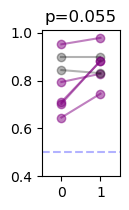

In [309]:
title='svm_sb_before_during'
color = '#800080'
plotplot(acc_bda_svm_sb,0,1,title,color)

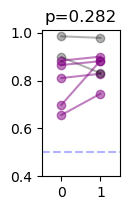

In [310]:
title='svm_sb_after_during'
color = '#800080'
plotplot(acc_bda_svm_sb,2,1, title,color)

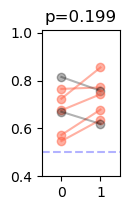

In [311]:
title='svm_ab_before_during'
color = '#FF6347'
plotplot(acc_bda_svm_ab,0,1,title,color)


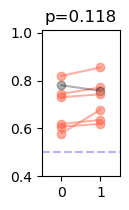

In [312]:
title='svm_ab_after_during'
color = '#FF6347'
plotplot(acc_bda_svm_ab,2,1,title,color)


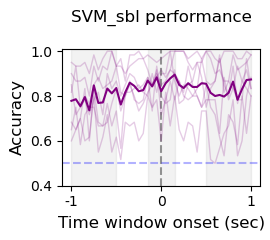

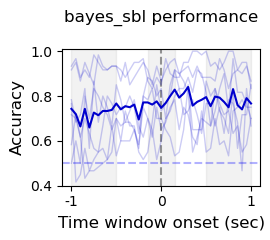

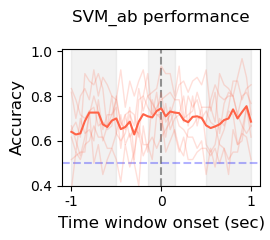

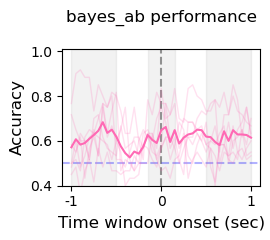

In [315]:
model_data_list = ['SVM_sbl', 'bayes_sbl', 'SVM_ab', 'bayes_ab']
colors = ['#800080', '#0000CD', '#FF6347', '#FF69B4']

for mew in range(len(model_data_list)):


    model_data=model_data_list[mew]
    color = colors[mew]

    plt.figure(figsize=(2.8,2.5)) 
    plt.axvline(20 ,color='black', linestyle='--', alpha=0.4)
    plt.axhline(0.5, color='blue', linestyle='--', alpha=0.3)
    for i in range(len(s)):
        plt.plot(shift_models_loaded[model_data][i], color=color, alpha=0.2, linewidth=1)
    mean_accuracy = np.mean(np.array(shift_models_loaded[model_data]), axis=0)
    plt.plot(mean_accuracy, color=color, alpha=1)

    plt.axvspan(17,23, color='black', alpha=0.05)
    plt.axvspan(0,10, color='black', alpha=0.05)
    plt.axvspan(30,40, color='black', alpha=0.05)

    plt.xlabel('Time window onset (sec)',  fontsize=12)
    plt.ylabel('Accuracy',  fontsize=12)
    plt.title(f"{model_data} performance\n")
    plt.xticks([0,20,40], labels=[-1,0,1])

    # plt.legend()
    plt.ylim(0.4,1.01)
    plt.tight_layout()
    plt.savefig(f'C:\\Users\\ebukina\\Desktop\\eva\\results\\window_shift\\shift_acc_{model_data}.png', dpi=300, bbox_inches='tight')
    plt.show()


shuffle control

In [243]:
SVM_sbl_sh = []

for ses in range(len(s)):
    ses_acc = np.array(SVM_sbl[ses])
    ids = list(range(len(ses_acc)))
    random.shuffle(ids)
    ses_acc = ses_acc[ids]
    SVM_sbl_sh.append(ses_acc)

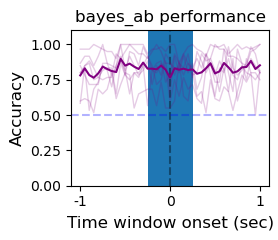

In [245]:
plt.figure(figsize=(2.8,2.5)) 
plt.axvline(20 ,color='black', linestyle='--', alpha=0.4)
plt.axhline(0.5, color='blue', linestyle='--', alpha=0.3)
for i in range(len(s)):
    plt.plot(SVM_sbl_sh[i], color='#800080', alpha=0.2, linewidth=1)
mean_accuracy = np.mean(np.array(SVM_sbl_sh), axis=0)
plt.plot(mean_accuracy, color='#800080', alpha=1)
plt.xlabel('Time window onset (sec)',  fontsize=12)
plt.ylabel('Accuracy',  fontsize=12)
plt.title(f"{model_data} performance")
plt.axvspan(15,25)
plt.xticks([0,20,40], labels=[-1,0,1])

# plt.legend()
plt.ylim(0,1.1)
plt.tight_layout()
# plt.savefig(f'C:\\Users\\ebukina\\Desktop\\eva\\results\\window_shift\\shift_acc_{model_data}.png', dpi=300, bbox_inches='tight')
plt.show()

In [130]:
def stat_sh(model, color,j):
    # Example list of 7 vectors (each vector representing accuracies over time for a session)
    sessions = []
    for ses in range(len(s)):
        sessions.append(np.array(model[ses]))


    # Define the time indices (assuming they are the same for all sessions)
    time_indices = np.array(range(-20, 21))  # Example time indices from -10 to 10

    # Define time windows
    # baseline_window = (-20, -10)  # Example time window before time zero
    baseline_window = (10, 20)  # Example time window before time zero
    post_zero_window = (-5, 5)   # Example time window around time zero

    # Calculate observed mean accuracies in the defined windows
    baseline_indices = (time_indices >= baseline_window[0]) & (time_indices <= baseline_window[1])
    post_zero_indices = (time_indices >= post_zero_window[0]) & (time_indices <= post_zero_window[1])

    baseline_accuracies = [np.mean(session[baseline_indices]) for session in sessions]
    post_zero_accuracies = [np.mean(session[post_zero_indices]) for session in sessions]

    baseline_mean_accuracy = np.mean(baseline_accuracies)
    post_zero_mean_accuracy = np.mean(post_zero_accuracies)

    print(baseline_mean_accuracy, post_zero_mean_accuracy)

    # Calculate observed difference
    observed_diff = post_zero_mean_accuracy - baseline_mean_accuracy

    print(observed_diff)

    # Number of permutations
    n_permutations = 1000
    shuffled_diffs = []

    for _ in range(n_permutations):
        shuffled_sessions = [np.random.permutation(session) for session in sessions]
        
        shuffled_baseline_accuracies = [np.mean(session[baseline_indices]) for session in shuffled_sessions]
        shuffled_post_zero_accuracies = [np.mean(session[post_zero_indices]) for session in shuffled_sessions]
        
        shuffled_baseline_mean = np.mean(shuffled_baseline_accuracies)
        shuffled_post_zero_mean = np.mean(shuffled_post_zero_accuracies)
        
        shuffled_diff = shuffled_post_zero_mean - shuffled_baseline_mean
        shuffled_diffs.append(shuffled_diff)

    shuffled_diffs = np.array(shuffled_diffs)

    # Calculate p-value
    p_value = np.sum(shuffled_diffs >= observed_diff) / n_permutations
    print(p_value)

    # Plot the distribution of shuffled differences
    plt.figure(figsize=(3,2.3)) 
    plt.hist(shuffled_diffs, bins=30, alpha=0.5, color=color)
    plt.axvline(observed_diff, color='green')
    plt.xlabel('Difference in Mean Accuracy', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xlim(-0.1,0.1)
    plt.ylim(0,110)
    plt.tight_layout()
    plt.title(f'diff = {observed_diff:.3f}, p_val = {p_value:.3f}')
    plt.savefig(f'C:\\Users\\ebukina\\Desktop\\eva\\results\\window_shift\\{j}_permutation_accuracy_after.png', dpi=300, bbox_inches='tight')
    plt.show()

0.8281385281385282 0.8528138528138528
0.024675324675324628
0.029


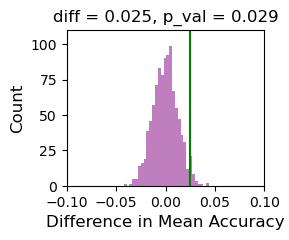

0.7774891774891773 0.7751082251082251
-0.0023809523809522615
0.542


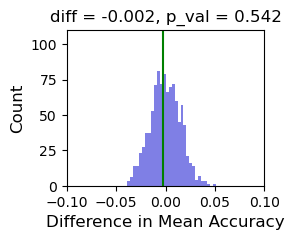

0.696969696969697 0.7164502164502163
0.01948051948051932
0.074


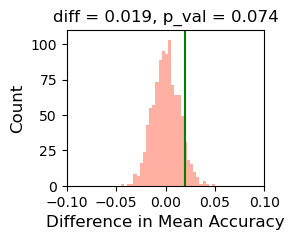

0.618181818181818 0.6084415584415586
-0.009740259740259494
0.757


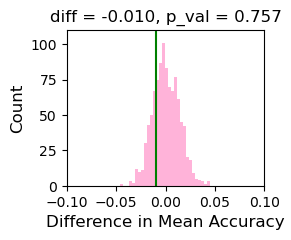

In [131]:
for j, model in enumerate([SVM_sbl, bayes_sbl, SVM_ab, bayes_ab]):
    stat_sh(model, color=colors[j], j=j)

## MD windows

In [4]:
MD_matrices = []

for i in range(len(s)):
    mouse = m[i]
    Session = s[i]
    with open(f'C:\\Users\\ebukina\\Desktop\\eva\\results\\window_shift\\S{Session}\\{mouse}_S{Session}_MD_matrix_all.pkl', 'rb') as f:
        MD_matrix = pickle.load(f)
        MD_matrices.append(MD_matrix)

In [5]:
MD_matrices

[array([[[0.68811732, 0.76574852, 0.75941743],
         [       nan, 0.82114096, 1.47274356],
         [       nan,        nan, 1.220676  ]],
 
        [[0.73575479, 0.92557754, 0.63641302],
         [       nan, 0.96016288, 1.40672418],
         [       nan,        nan, 1.23982012]],
 
        [[0.80640018, 0.87397169, 0.81520923],
         [       nan, 0.92657843, 1.49320294],
         [       nan,        nan, 1.10382519]],
 
        [[0.70857137, 0.93769244, 0.95610844],
         [       nan, 0.87458774, 1.58906339],
         [       nan,        nan, 1.09087803]],
 
        [[0.78958937, 0.9308318 , 0.94835691],
         [       nan, 0.89492756, 1.57921085],
         [       nan,        nan, 1.03086984]],
 
        [[0.7112701 , 0.89803085, 1.22731917],
         [       nan, 0.83512489, 1.74316537],
         [       nan,        nan, 1.07824383]],
 
        [[0.81965034, 0.85899007, 1.32062621],
         [       nan, 0.88612215, 1.80885762],
         [       nan,        nan, 1.135873

In [6]:
MD_tensor = np.stack(MD_matrices)

In [7]:
MD_tensor.shape

(7, 41, 3, 3)

In [268]:
np.mean(MD_tensor[1,:11,:,:], axis=0).shape

(3, 3)

In [250]:
def D_plot(D_matrices, a,b, tit, color='blue'):
    plt.figure(figsize=(2.8,2.5)) 
    plt.axvline(20 ,color='black', linestyle='--', alpha=0.4)

    list_for_mean = []
    for i in range(len(D_matrices)):
        matrix = D_matrices[i]
        list_for_mean.append(matrix[:,a,b])
        plt.plot(matrix[:,a,b], color=color, alpha=0.2, linewidth=1)
    mean_ED = np.mean(np.array(list_for_mean), axis=0)
    plt.plot(mean_ED, color=color, alpha=1)
    plt.axvspan(17,23, color='black', alpha=0.05)
    plt.axvspan(0,10, color='black', alpha=0.05)
    plt.axvspan(30,40, color='black', alpha=0.05)


    plt.xlabel('Time window onset (sec)',  fontsize=12)
    plt.ylabel('Mahalanobis distance',  fontsize=12)
    plt.title(tit+'\n')
    plt.xticks([0,20,40], labels=[-1,0,1])

    # plt.legend()
    plt.ylim(-0.1,2.5)
    plt.tight_layout()
    plt.savefig(f'C:\\Users\\ebukina\\Desktop\\eva\\results\\window_shift\\{tit}.png', dpi=300, bbox_inches='tight')
    plt.show()

In [269]:
def before_during_after_D(MD_tensor):

    n_sessions = MD_tensor.shape[0]

    D_bda = np.zeros((n_sessions,3,3,3)) # ses, bef/dur/after, 3*3 dist matrix

    for i in range(n_sessions):
        D_before = np.mean(MD_tensor[i,:11,:,:], axis=0) # 11 windows
        D_during = np.mean(MD_tensor[i,17:24,:,:], axis=0)
        D_after = np.mean(MD_tensor[i,30:,:,:], axis=0)

        D_bda[i,0,:,:] = D_before
        D_bda[i,1,:,:] = D_during
        D_bda[i,2,:,:] = D_after

    return D_bda

In [270]:
MD_bda = before_during_after_D(MD_tensor) # ses, b/dur/af, 3*3 matrix
MD_bda.shape

(7, 3, 3, 3)

In [358]:
def plotplot2(matrix, a, b, x, y, title, color, ylimm = [0,2.5]):

    '''    
    a = 0 #before
    b = 1 # during
    x = 0 # location in dist matrix 3*3
    y = 0 # location in dist matrix 3*3
    matrix= your 4d tensor
    '''

    #stat: paired t test
    _, p_value = ttest_rel(matrix[:,a,x,y], matrix[:,b,x,y])


    plt.figure(figsize=(1.4,2.2))
    # lines with dots
    for i in range(len(matrix)):
        ab_matrix = [matrix[i,a,x,y],matrix[i,b,x,y]]
        if matrix[i,a,x,y] < matrix[i,b,x,y]:
            plt.plot(range(len(ab_matrix)), ab_matrix, marker='o',color=color, alpha=0.5)
        else:
            plt.plot(range(len(ab_matrix)), ab_matrix, marker='o',color='black', alpha=0.3)
  
    plt.xlim(-0.5,1.5)
    plt.ylim(ylimm)
    # plt.yticks([0,1,2], labels=[0,1,2])
    # plt.yticks([0,1], labels=[0,1])
    # plt.ylabel('Mahalanobis distance', fontsize=12)
    plt.title(f'p={p_value:.3f}')
    plt.tight_layout()
    plt.savefig(f'C:\\Users\\ebukina\\Desktop\\eva\\results\\window_shift\\{title}.png', dpi=300, bbox_inches='tight')
    plt.show()

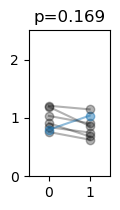

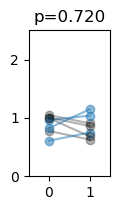

In [300]:
a = 0 #before/after
b = 1 # during
x = 0 # location in dist matrix 3*3
y = 0 # location in dist matrix 3*3
matrix= MD_bda
title = 'Alpha sparsity (MD) be-dur'
color = '#1F77B4'

plotplot2(matrix, a, b, x, y, title, color)

a = 2 #before/after
b = 1 # during
x = 0 # location in dist matrix 3*3
y = 0 # location in dist matrix 3*3
matrix= MD_bda
title = 'Alpha sparsity (MD) af-dur'
color = '#1F77B4'

plotplot2(matrix, a, b, x, y, title, color)

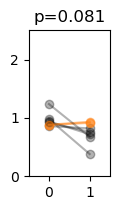

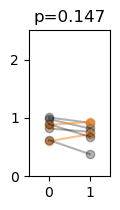

In [301]:
a = 0
b = 1 #before/after - during
x=1
y=1 # location in dist matrix 3*3
matrix= MD_bda
title = 'Beta sparsity (MD) be-dur'
color = '#FF8113'

plotplot2(matrix, a, b, x, y, title, color)

a=2
b=1 #before/after - during
x=1
y=1 # location in dist matrix 3*3
matrix= MD_bda
title = 'Beta sparsity (MD) af-dur'
color = '#FF8113'

plotplot2(matrix, a, b, x, y, title, color)

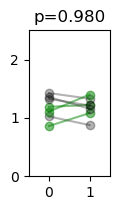

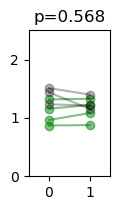

In [302]:
a = 0
b = 1 #before/after - during
x=2
y=2 # location in dist matrix 3*3
matrix= MD_bda
title = 'Blank sparsity (MD) be-dur'
color = 'green'

plotplot2(matrix, a, b, x, y, title, color)

a=2
b=1 #before/after - during
x=2
y=2 # location in dist matrix 3*3
matrix= MD_bda
title = 'Blank sparsity (MD) af-dur'
color = 'green'

plotplot2(matrix, a, b, x, y, title, color)

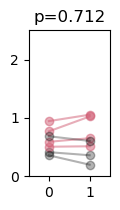

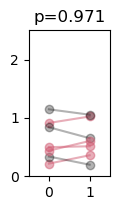

In [303]:
a = 0
b = 1 #before/after - during
x=0
y=1 # location in dist matrix 3*3
matrix= MD_bda
title = 'MD alpha-beta be-dur'
color = '#d15c73'

plotplot2(matrix, a, b, x, y, title, color)

a=2
b=1 #before/after - during
x=0
y=1 # location in dist matrix 3*3
matrix= MD_bda
title = 'MD alpha-beta af-dur'
color = '#d15c73'

plotplot2(matrix, a, b, x, y, title, color)

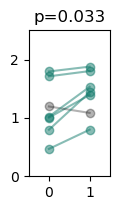

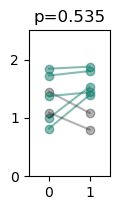

In [304]:
a,b = 0,1 #before/after - during
x,y=0,2 # location in dist matrix 3*3
matrix= MD_bda
title = 'MD alpha-blank be-dur'
color = '#137b6c'

plotplot2(matrix, a, b, x, y, title, color)

a,b = 2,1 #before/after - during
x,y=0,2 # location in dist matrix 3*3
matrix= MD_bda
title = 'MD alpha-blank af-dur'
color = '#137b6c'

plotplot2(matrix, a, b, x, y, title, color)

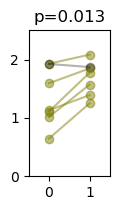

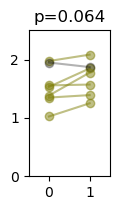

In [305]:
a,b = 0,1 #before/after - during
x,y=1,2 # location in dist matrix 3*3
matrix= MD_bda
title = 'MD beta-blank be-dur'
color = '#80800a'

plotplot2(matrix, a, b, x, y, title, color)

a,b = 2,1 #before/after - during
x,y=1,2 # location in dist matrix 3*3
matrix= MD_bda
title = 'MD beta-blank af-dur'
color = '#80800a'

plotplot2(matrix, a, b, x, y, title, color)

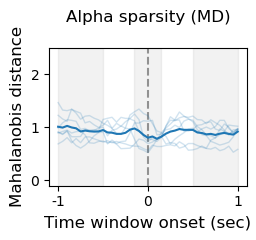

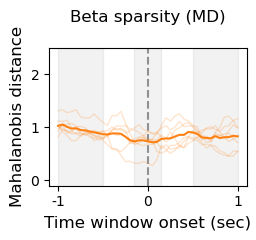

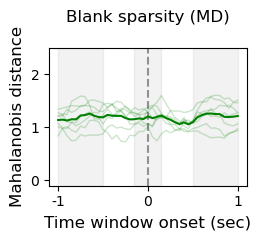

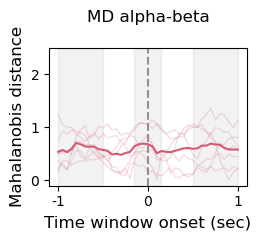

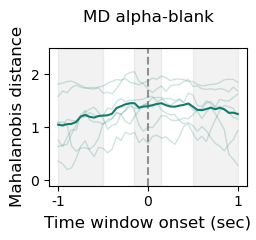

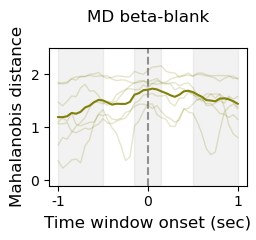

In [289]:
D_plot(MD_matrices,0,0,'Alpha sparsity (MD)','#1F77B4')
D_plot(MD_matrices,1,1,'Beta sparsity (MD)','#FF8113')
D_plot(MD_matrices,2,2, 'Blank sparsity (MD)','green')
D_plot(MD_matrices,0,1, 'MD alpha-beta', '#d15c73')
D_plot(MD_matrices,0,2, 'MD alpha-blank','#137b6c')
D_plot(MD_matrices,1,2, 'MD beta-blank', '#80800a')

In [6]:
len(MD_matrices)

7

In [9]:
len(MD_matrices[0]) #20

41

In [8]:
MD_matrices[0]

array([[[0.68811732, 0.76574852, 0.75941743],
        [       nan, 0.82114096, 1.47274356],
        [       nan,        nan, 1.220676  ]],

       [[0.73575479, 0.92557754, 0.63641302],
        [       nan, 0.96016288, 1.40672418],
        [       nan,        nan, 1.23982012]],

       [[0.80640018, 0.87397169, 0.81520923],
        [       nan, 0.92657843, 1.49320294],
        [       nan,        nan, 1.10382519]],

       [[0.70857137, 0.93769244, 0.95610844],
        [       nan, 0.87458774, 1.58906339],
        [       nan,        nan, 1.09087803]],

       [[0.78958937, 0.9308318 , 0.94835691],
        [       nan, 0.89492756, 1.57921085],
        [       nan,        nan, 1.03086984]],

       [[0.7112701 , 0.89803085, 1.22731917],
        [       nan, 0.83512489, 1.74316537],
        [       nan,        nan, 1.07824383]],

       [[0.81965034, 0.85899007, 1.32062621],
        [       nan, 0.88612215, 1.80885762],
        [       nan,        nan, 1.13587379]],

       [[0.82018031,

In [9]:
MD_matrices[0][20]

array([[0.56580468, 1.05315604, 1.44212844],
       [       nan, 0.75453198, 1.82403306],
       [       nan,        nan, 1.28231546]])

In [11]:
MD_npoke_all_sessions = np.zeros((7,3,3))
for ses in range(len(MD_matrices)):
    MD_npoke_all_sessions[ses,:,:] = MD_matrices[ses][20]

In [12]:
MD_npoke_mean = np.mean(MD_npoke_all_sessions, axis=0)
MD_npoke_mean

array([[0.80482085, 0.68272564, 1.39745999],
       [       nan, 0.73501824, 1.70982694],
       [       nan,        nan, 1.20573414]])

In [13]:
import seaborn as sns
import math

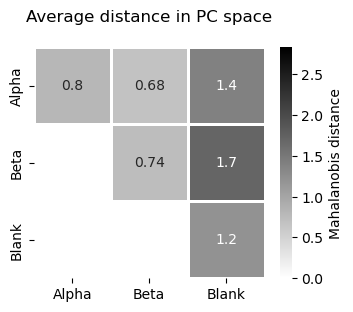

In [14]:
plt.figure(figsize=(4, 3))

labels = ['Alpha', 'Beta', 'Blank']

# Create the heatmap
sns.heatmap(MD_npoke_mean, annot=MD_npoke_mean, cmap='binary', cbar_kws={'label': 'Mahalanobis distance'}, linewidths=1, linecolor='white', square=True, vmin=0, vmax=math.sqrt(8))

# # Customize the heatmap
plt.xticks(ticks=np.arange(len(labels))+0.5, labels=labels, rotation=0)
plt.yticks(ticks=np.arange(len(labels))+0.5, labels=labels, rotation=90)

plt.title('Average distance in PC space\n')
plt.savefig(f'C:\\Users\\ebukina\\Desktop\\eva\\results\\window_shift\\mean_MD_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

In [16]:
MD_matrices[2][20]

array([[0.72921798, 1.06616001, 1.00579484],
       [       nan, 0.74638445, 2.07194492],
       [       nan,        nan, 1.01160857]])

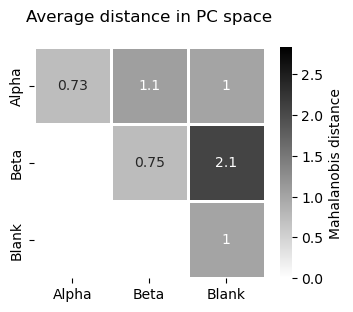

In [17]:
plt.figure(figsize=(4, 3))

labels = ['Alpha', 'Beta', 'Blank']

# Create the heatmap
sns.heatmap(MD_matrices[2][20], annot=MD_matrices[2][20], cmap='binary', cbar_kws={'label': 'Mahalanobis distance'}, linewidths=1, linecolor='white', square=True, vmin=0, vmax=math.sqrt(8))

# # Customize the heatmap
plt.xticks(ticks=np.arange(len(labels))+0.5, labels=labels, rotation=0)
plt.yticks(ticks=np.arange(len(labels))+0.5, labels=labels, rotation=90)

plt.title('Average distance in PC space\n')
plt.savefig(f'C:\\Users\\ebukina\\Desktop\\eva\\results\\window_shift\\s11_MD_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

In [18]:
# significant MD across sessions
ab = [2,7]
ac = [7,7]
bc = [7,7]

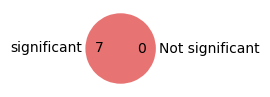

In [35]:
what = 'MDac'
plt.figure(figsize=(1,1))
# Data to plot
labels = 'significant', 'Not significant'
sizes = [7,0]
colors = ['#e87373', '#808080']

def absolute_value(val):
    a  = int(val/100.*sum(sizes))
    return a

# Plot
plt.pie(sizes, labels=labels, autopct=absolute_value, colors=colors)

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.savefig(f'C:\\Users\\ebukina\\Desktop\\eva\\results\\populational_anal\\pie_{what}.png', dpi=300, bbox_inches='tight')
plt.show()

## ED windows

In [132]:
ED_matrices = []

for i in range(len(s)):
    mouse = m[i]
    Session = s[i]
    with open(f'C:\\Users\\ebukina\\Desktop\\eva\\results\\window_shift\\S{Session}\\{mouse}_S{Session}_ED_matrix_all.pkl', 'rb') as f:
        ED_matrix = pickle.load(f)
        ED_matrices.append(ED_matrix)

In [142]:
def ED_plot(a,b, tit=None, color='blue'):
    plt.figure(figsize=(2.8,2.5)) 
    plt.axvline(20 ,color='black', linestyle='--', alpha=0.4)

    list_for_mean = []
    for i in range(len(ED_matrices)):
        matrix = ED_matrices[i]
        list_for_mean.append(matrix[:,a,b])
        plt.plot(matrix[:,a,b], color=color, alpha=0.2, linewidth=1)
    mean_ED = np.mean(np.array(list_for_mean), axis=0)
    plt.plot(mean_ED, color=color, alpha=1)


    plt.xlabel('Time window onset (sec)',  fontsize=12)
    plt.ylabel('Euclidean distance',  fontsize=12)
    plt.title(tit)
    plt.xticks([0,20,40], labels=[-1,0,1])

    # plt.legend()
    plt.ylim(-0.1,1.1)
    plt.tight_layout()
    plt.savefig(f'C:\\Users\\ebukina\\Desktop\\eva\\results\\window_shift\\ED[{a},{b}].png', dpi=300, bbox_inches='tight')
    plt.show()

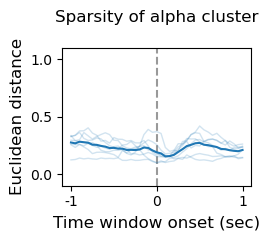

In [149]:
ED_plot(0,0,'Sparsity of alpha cluster\n','#1F77B4')

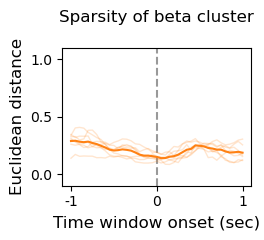

In [150]:
ED_plot(1,1,'Sparsity of beta cluster\n','#FF8113')

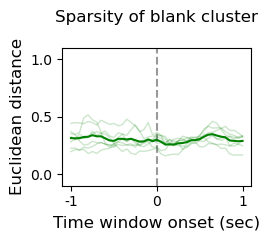

In [151]:
ED_plot(2,2, 'Sparsity of blank cluster\n','green')

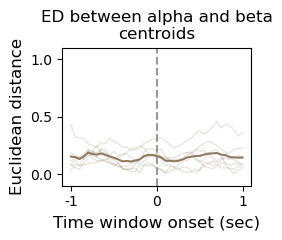

In [152]:
ED_plot(0,1, 'ED between alpha and beta\ncentroids', '#8f7c64')

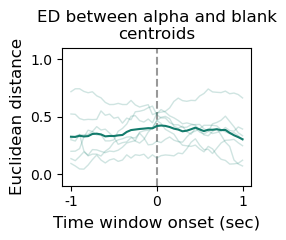

In [153]:
ED_plot(0,2, 'ED between alpha and blank\ncentroids','#137b6c')

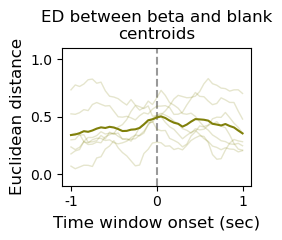

In [154]:
ED_plot(1,2, 'ED between beta and blank\ncentroids', '#80800a')

## Cosine similarity

In [316]:
abbl = [[2,1],[1,2],[2,1],[2,1],[2,1],[2,1],[2,1],[2,1]]

In [317]:
shift_lists = []
m = ['3C280','3C280','3C290','3C290','3C290','3C290','3C290']
for i in range(len(s)):
    mouse = m[i]
    Session = s[i]
    with open(f'C:\\Users\\ebukina\\Desktop\\eva\\results\\window_shift\\S{Session}\\{mouse}_S{Session}_shift_tensor.pkl', 'rb') as f:
        shift_tensor = pickle.load(f)
        shift_lists.append(shift_tensor)

In [318]:
shift_lists[0].shape

(41, 90, 23)

In [319]:
from sklearn.metrics.pairwise import cosine_similarity

In [320]:
sessions_cos_sim = []
for i in range(len(s)):
    cos_sim = []
    for w in range(shift_lists[i].shape[0]):
        m = shift_lists[i][w,:,:]
        k = int(len(m)/3)
        a = m[:k,:]
        b = m[k:k+k,:]
        c = m[k+k:,:]

        similarity_matrix_list =[]
        for trial in range(30):
            abc = np.zeros((3,shift_lists[i].shape[2]))
            abc[0,:] = a[trial,:]
            abc[1,:] =  b[trial,:]
            abc[2,:] = c[trial,:]
            similarity_matrix_list.append(cosine_similarity(abc))
        similarity_matrix_tensor = np.stack(similarity_matrix_list, axis=0) 
        cos_sim.append(similarity_matrix_tensor)


In [321]:
similarity_matrix_tensor.shape

(30, 3, 3)

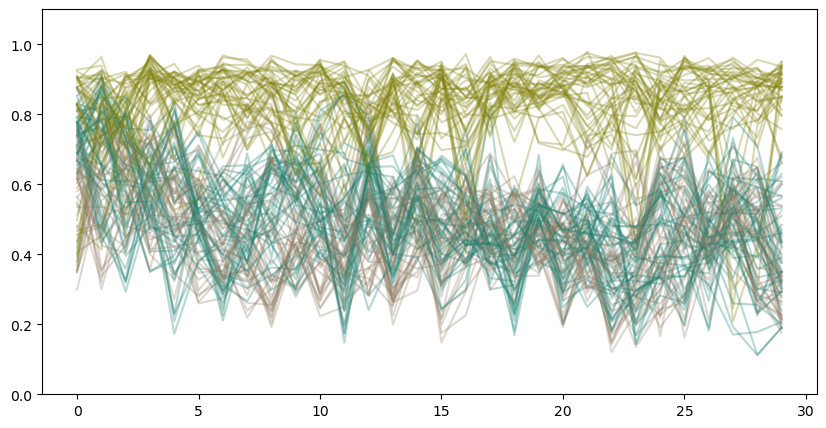

In [63]:
plt.figure(figsize=(10,5)) 
# plt.axvline(20 ,color='black', linestyle='--', alpha=0.4)

for shift in range(shift_lists[0].shape[0]):
    similarity_matrix_tensor = cos_sim[shift]
    plt.plot(similarity_matrix_tensor[:,0,1], color='#80800a', alpha=0.3, label='alpha vs beta')
    plt.plot(similarity_matrix_tensor[:,0,2], color='#137b6c', alpha=0.3, label='alpha vs blank')
    plt.plot(similarity_matrix_tensor[:,1,2], color='#8f7c64', alpha=0.3, label='beta vs blank')


# plt.xlabel('Time window onset (sec)',  fontsize=12)
# plt.ylabel('Euclidean distance',  fontsize=12)
# plt.title(f"[:,{a},{b}]")
# plt.xticks([0,20,40], labels=[-1,0,1])

# plt.legend()
plt.ylim(0,1.1)
# plt.tight_layout()
# plt.savefig(f'C:\\Users\\ebukina\\Desktop\\eva\\results\\window_shift\\ED[{a},{b}].png', dpi=300, bbox_inches='tight')
plt.show()

In [322]:
sessions_cos_sim = []
for i in range(len(s)):
    cos_sim2 = []
    for w in range(shift_lists[i].shape[0]):
        m = shift_lists[i][w,:,:]
        k = int(len(m)/3)
        a = np.mean(m[:k,:], axis=0)
        b = np.mean(m[k:k+k,:], axis=0)
        c = np.mean(m[k+k:,:], axis=0)

        abc = np.array((a,b,c))
        cos_sim2.append(cosine_similarity(abc))
        
    cos_sim2_tensor = np.stack(cos_sim2, axis=0) 
    sessions_cos_sim.append(cos_sim2_tensor)


In [323]:
sessions_cos_sim[0].shape

(41, 3, 3)

In [332]:
sessions_cos_sim_tensor = np.stack(sessions_cos_sim)
sessions_cos_sim_tensor.shape

(7, 41, 3, 3)

In [335]:
np.mean(sessions_cos_sim_tensor[:,:,0,1], axis=0).shape

(41,)

In [329]:
data = [[0,2], [1,2], [0,1]]
colors = ['#137b6c', '#80800a', '#d15c73']
titles = ['alpha vs blank', 'beta vs blank', 'alpha vs beta']

In [330]:
for j in range(3):    
    a = data[j][0]
    b = data[j][1]
    print(a,b, colors[j])

0 2 #137b6c
1 2 #80800a
0 1 #d15c73


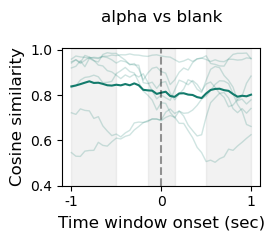

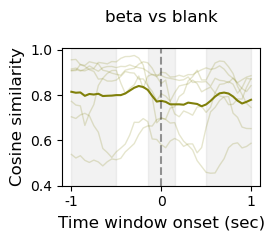

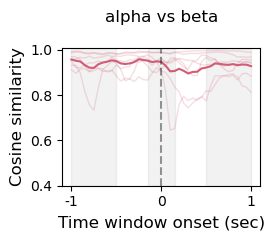

In [362]:
for j in range(3):    
    plt.figure(figsize=(2.8,2.5)) 

    a = data[j][0]
    b = data[j][1]
    for i in range(len(s)):
        cos_sim2_tensor = sessions_cos_sim[i]
        plt.plot(cos_sim2_tensor[:,a,b], color=colors[j], alpha=0.2, linewidth=1)
    
    mean_cos = np.mean(sessions_cos_sim_tensor[:,:,a,b], axis=0)
    plt.plot(mean_cos, color=colors[j], alpha=1)
    plt.axvspan(17,23, color='black', alpha=0.05)
    plt.axvspan(0,10, color='black', alpha=0.05)
    plt.axvspan(30,40, color='black', alpha=0.05)
    plt.axvline(20 ,color='black', linestyle='--', alpha=0.4)
    plt.xlabel('Time window onset (sec)',  fontsize=12)
    plt.ylabel('Cosine similarity',  fontsize=12)
    plt.title(titles[j]+'\n')
    plt.xticks([0,20,40], labels=[-1,0,1])
    plt.ylim(0.4,1.01)
    plt.tight_layout()
    plt.savefig(f'C:\\Users\\ebukina\\Desktop\\eva\\results\\window_shift\\cosine_similarity_{titles[j]}.png', dpi=300, bbox_inches='tight')
    plt.show()

In [340]:
cossim_bda = before_during_after_D(sessions_cos_sim_tensor)
cossim_bda.shape

(7, 3, 3, 3)

In [ ]:
data = [[0,2], [1,2], [0,1]]
colors = ['#137b6c', '#80800a', '#d15c73']
titles = ['alpha vs blank', 'beta vs blank', 'alpha vs beta']

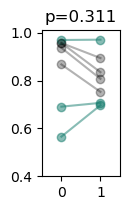

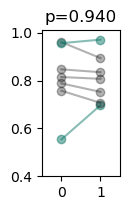

In [359]:
a,b = 0,1
x,y = 0,2
matrix= MD_bda
title = 'Alpha vs blank bef-during'
color = '#137b6c'
plotplot2(cossim_bda, a, b, x, y, title, color, ylimm = [0.4,1.01])

a,b = 2,1
x,y = 0,2
matrix= MD_bda
title = 'Alpha vs blank af-during'
color = '#137b6c'
plotplot2(cossim_bda, a, b, x, y, title, color, ylimm = [0.4,1.01])

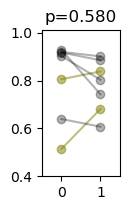

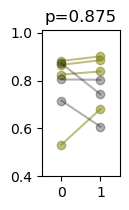

In [360]:
a,b = 0,1
x,y = 1,2
matrix= MD_bda
title = 'Beta vs blank bef-during'
color = '#80800a'
plotplot2(cossim_bda, a, b, x, y, title, color, ylimm = [0.4,1.01])

a,b = 2,1
x,y = 1,2
matrix= MD_bda
title = 'Beta vs blank af-during'
color = '#80800a'
plotplot2(cossim_bda, a, b, x, y, title, color, ylimm = [0.4,1.01])

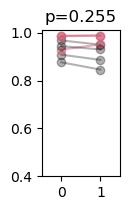

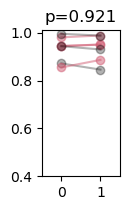

In [361]:
a,b = 0,1
x,y = 0,1
matrix= MD_bda
title = 'Alpha vs Beta bef-during'
color = '#d15c73'
plotplot2(cossim_bda, a, b, x, y, title, color, ylimm = [0.4,1.01])

a,b = 2,1
x,y = 0,1
matrix= MD_bda
title = 'Alpha vs Beta af-during'
color = '#d15c73'
plotplot2(cossim_bda, a, b, x, y, title, color, ylimm = [0.4,1.01])

## Evening test

In [107]:
s = [38,45,46,11,14,19,20]
m = ['3C280','3C280','3C280','3C290','3C290','3C290','3C290']

In [108]:
acc_svm = []
pvals = []

acc_svm_m = []
pvals_m = []

for i in range(len(s)):
    mouse = m[i]
    Session = s[i]
    with open(f'C:\\Users\\ebukina\\Desktop\\eva\\results\\models_evening\\{mouse}_S{Session}_classifiers_results.pkl', 'rb') as f:
        classifiers_results = pickle.load(f)
        acc_svm.append(classifiers_results['svm']['acc'])
        pvals.append(classifiers_results['svm']['pval'])
        acc_svm_m.append(classifiers_results['svm']['acc_m'])
        pvals_m.append(classifiers_results['svm']['pval_m'])

In [109]:
acc_svm = np.array(acc_svm)
pvals = np.array(pvals)
acc_svm_m = np.array(acc_svm_m)
pvals_m = np.array(pvals_m)

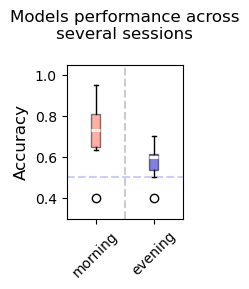

In [112]:
# Sample data
data = [acc_svm_m, acc_svm]
labels = ['morning', 'evening']
colors = ['#FF6347', '#0000CD']

# Create the box plot
plt.figure(figsize=(1.5,2))
boxplot = plt.boxplot(data, patch_artist=True)

# Set the colors and transparency for the boxes
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.5)  # Set transparency level

# Change the color of the median lines
for median in boxplot['medians']:
    median.set_color('white')  # Change this to your preferred color
    median.set_linewidth(2)    # Optionally adjust the line width

# Add horizontal and vertical lines
plt.axhline(0.5, color='blue', linestyle='--', alpha=0.2)
plt.axvline(1.5, color='k', linestyle='--', alpha=0.2)

# Add titles and labels
plt.title('Models performance across\nseveral sessions\n')
plt.ylabel('Accuracy', fontsize=12)
plt.ylim(0.3, 1.05)
plt.xticks([1, 2], labels)
plt.xticks(rotation=45)

# Save the figure
plt.savefig('C:\\Users\\ebukina\\Desktop\\eva\\results\\models_evening\\svm_acc_boxplots.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

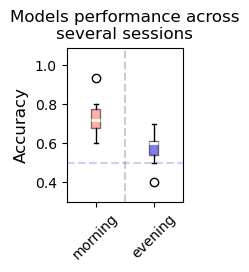

In [114]:
# Sample data
data = [acc_ab_svm, acc_svm]
labels = ['morning', 'evening']
colors = ['#FF6347', '#0000CD']

# Create the box plot
plt.figure(figsize=(1.5,2))

# Add horizontal and vertical lines
plt.axhline(0.5, color='blue', linestyle='--', alpha=0.2)
plt.axvline(1.5, color='k', linestyle='--', alpha=0.2)

boxplot = plt.boxplot(data, patch_artist=True)

# Set the colors and transparency for the boxes
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.5)  # Set transparency level

# Change the color of the median lines
for median in boxplot['medians']:
    median.set_color('white')  # Change this to your preferred color
    median.set_linewidth(2)    # Optionally adjust the line width



# Add titles and labels
plt.title('Models performance across\nseveral sessions')
plt.ylabel('Accuracy', fontsize=12)
plt.ylim(0.3, 1.09)
plt.xticks([1, 2], labels)
plt.xticks(rotation=45)

# Save the figure
plt.savefig('C:\\Users\\ebukina\\Desktop\\eva\\results\\models_evening\\svm_acc_boxplots.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

In [115]:
models = [acc_ab_svm, acc_svm]
for i,dat in enumerate(models):
    # Kolmogorov-Smirnov Test
    stat, p = stats.kstest(dat, 'norm')
    if p > 0.05:
        print(f"Distr is normal, p = {p:.3f}")
    else:
        print(f"Dist is NOT normal, p = {p:.3f}")

Dist is NOT normal, p = 0.000
Dist is NOT normal, p = 0.002


In [116]:
# Mann-Whitney U Test
stat, p = stats.mannwhitneyu(acc_ab_svm, acc_svm)
print(f"Mann-Whitney U Test: U={stat}, p={p}")

if p > 0.05:
    print("No significant difference between samples.")
else:
    print("Significant difference between samples.")

Mann-Whitney U Test: U=44.5, p=0.012230513254076777
Significant difference between samples.


In [117]:
MD_matrices = []

for i in range(len(s)):
    mouse = m[i]
    Session = s[i]
    with open(f'C:\\Users\\ebukina\\Desktop\\eva\\results\\models_evening\\{mouse}_S{Session}_D_matrix.pkl', 'rb') as f:
        MD_matrix = pickle.load(f)
        MD_matrices.append(MD_matrix)

In [118]:
MD_npoke_all_sessions = np.zeros((len(MD_matrices),4,4))
for ses in range(len(MD_matrices)):
    MD_npoke_all_sessions[ses,:,:] = MD_matrices[ses]

In [119]:
MD_npoke_mean = np.mean(MD_npoke_all_sessions, axis=0)

In [120]:
def plot_distance_matrix(D_matrix, D_type = "MD", rotate=False):
    plt.figure(figsize=(3.5, 2))

    labels = ['Alpha1', 'Beta1', 'Alpha2', 'Beta2']

    if D_type=='MD':
        cbar_label = 'Mahalanobis distance'
    else:
        cbar_label = 'Euclidean distance'

    if rotate:
        # Create the heatmap
        heatmap = sns.heatmap(D_matrix, annot=D_matrix, cmap='binary', cbar_kws={'label': cbar_label}, linewidths=1, linecolor='white', square=True, vmin=0, vmax=math.sqrt(8))

        # # Customize the heatmap
        heatmap.set_xticklabels(labels, rotation=0)
        heatmap.set_yticklabels(labels, rotation=90)

        cbar = heatmap.collections[0].colorbar
        cbar.ax.tick_params(rotation=90)

    else:
        # Create the heatmap
        sns.heatmap(D_matrix, annot=D_matrix, cmap='binary', cbar_kws={'label': cbar_label}, linewidths=1, linecolor='white', square=True, vmin=0, vmax=math.sqrt(8))

        # # Customize the heatmap
        plt.xticks(ticks=np.arange(len(labels))+0.5, labels=labels, rotation=0)
        plt.yticks(ticks=np.arange(len(labels))+0.5, labels=labels, rotation=90)

    plt.title('Distance in PC space\n')
    plt.savefig(f'C:\\Users\\ebukina\\Desktop\\eva\\results\\models_evening\\MD_matrix.png', dpi=300, bbox_inches='tight')
    plt.show()

In [121]:
import seaborn as sns
import math

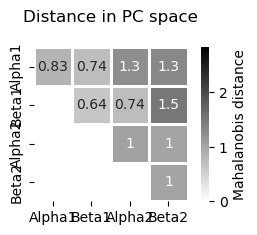

In [122]:
plot_distance_matrix(MD_npoke_mean)

In [123]:
# sparsity comparison
MD_npoke_all_sessions.shape


(7, 4, 4)

In [241]:
sp_a1 = MD_npoke_all_sessions[:,0,0]
sp_b1 = MD_npoke_all_sessions[:,1,1]
sp_a2 = MD_npoke_all_sessions[:,2,2]
sp_b2 = MD_npoke_all_sessions[:,3,3]

In [128]:
for dat in [sp_a1,sp_b1,sp_a2,sp_b2]:
    # Kolmogorov-Smirnov Test
    stat, p = stats.kstest(dat, 'norm')
    if p > 0.05:
        print(f"Distr is normal, p = {p:.3f}")
    else:
        print(f"Dist is NOT normal, p = {p:.3f}")

Dist is NOT normal, p = 0.003
Dist is NOT normal, p = 0.005
Dist is NOT normal, p = 0.002
Dist is NOT normal, p = 0.000


In [197]:
def dependentplot(before, after, color, title='nan', ylimm = [0,2.5]):

    '''    
    a = 0 #before
    b = 1 # during
    x = 0 # location in dist matrix 3*3
    y = 0 # location in dist matrix 3*3
    matrix= your 4d tensor
    '''
    plt.figure(figsize=(1,2))
    # lines with dots
    for i in range(len(sp_a1)):
        bef_af = np.array([before[i], after[i]])
        if before[i] < after[i]:
            plt.plot(range(len(bef_af)), bef_af, marker='o',color=color, alpha=0.5)
        else:
            plt.plot(range(len(bef_af)), bef_af, marker='o',color='black', alpha=0.3)
  
    plt.xlim(-0.5,1.5)
    plt.ylim(ylimm)
    # plt.yticks([0,1,2], labels=[0,1,2])
    # plt.yticks([0,1], labels=[0,1])
    # plt.ylabel('Mahalanobis distance', fontsize=12)
    plt.title(title+'\n')
    plt.tight_layout
    plt.savefig(f'C:\\Users\\ebukina\\Desktop\\eva\\results\\models_evening\\{title}.png', dpi=300, bbox_inches='tight')
    plt.show()

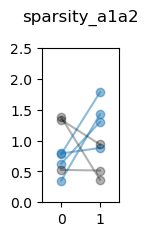

In [198]:
dependentplot(sp_a1, sp_a2, color='#1F77B4', title='sparsity_a1a2',ylimm = [0,2.5])

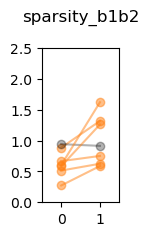

In [199]:
dependentplot(sp_b1, sp_b2, color='#FF8113', title='sparsity_b1b2',ylimm = [0,2.5])

paired ttest

In [190]:
from scipy.stats import ttest_rel

In [191]:
_, p_value = ttest_rel(sp_a1, sp_a2)
print(p_value, p_value<0.05)

0.5105533569566465 False


In [192]:
_, p_value = ttest_rel(sp_b1, sp_b2)
print(p_value, p_value<0.05)

0.03760413265219934 True


sparsity vs distance

In [236]:
d_a1a2 = MD_npoke_all_sessions[:,0,2]
d_b1b2 = MD_npoke_all_sessions[:,1,3]

In [243]:
sparsity_diff_a = sp_a2 - sp_a1
sparsity_diff_b = sp_b2 - sp_b1

In [230]:
from scipy.stats import pearsonr

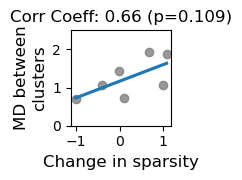

In [273]:
corr_coeff_a, p_value_a = pearsonr(sparsity_diff_a, d_a1a2)

plt.figure(figsize=(2.0,1.9))
sns.regplot(x=sparsity_diff_a, y=d_a1a2, ci=None, color='gray', line_kws={'color': '#1F77B4'})
plt.title(f'Corr Coeff: {corr_coeff_a:.2f} (p={p_value_a:.3f})')
plt.xlabel('Change in sparsity',  fontsize=12)
plt.ylabel('MD between\nclusters',  fontsize=12)
plt.ylim(0,2.5)
# plt.xlim(-1,1)
plt.savefig(f'C:\\Users\\ebukina\\Desktop\\eva\\results\\models_evening\\sparsity_vs_distance_aa.png', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()

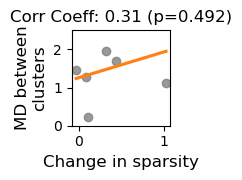

In [272]:
corr_coeff_b, p_value_b = pearsonr(sparsity_diff_b, d_b1b2)

plt.figure(figsize=(2.0,1.9))
sns.regplot(x=sparsity_diff_b, y=d_b1b2, ci=None, color='gray',line_kws={'color': '#FF8113'})
plt.title(f'Corr Coeff: {corr_coeff_b:.2f} (p={p_value_b:.3f})')
plt.xlabel('Change in sparsity',  fontsize=12)
plt.ylabel('MD between\nclusters',  fontsize=12)
plt.ylim(0,2.5)
# plt.xlim(-1.1,1.1)
plt.savefig(f'C:\\Users\\ebukina\\Desktop\\eva\\results\\models_evening\\sparsity_vs_distance_bb.png', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


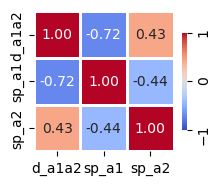

In [220]:

# Example data: each column is a vector d_a1a2,sp_a1,sp_a2
data = pd.DataFrame({
    'd_a1a2': d_a1a2,
    'sp_a1': sp_a1,
    'sp_a2': sp_a2
})

# Calculate correlation matrix
correlation_matrix = data.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(2.3, 2.3))
heatmap = sns.heatmap(correlation_matrix, cbar_kws={'shrink': 0.5},cmap='coolwarm',annot=True,  fmt=".2f", linewidths=1, linecolor='white', square=True, vmin=-1, vmax=1)

cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(rotation=90)
plt.tight_layout()
plt.savefig('C:\\Users\\ebukina\\Desktop\\eva\\results\\models_evening\\da_vs_sparsitya_corr.png', dpi=300, bbox_inches='tight')
plt.show()

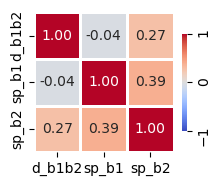

In [221]:
# Example data: each column is a vector d_a1a2,sp_a1,sp_a2
data = pd.DataFrame({
    'd_b1b2': d_b1b2,
    'sp_b1': sp_b1,
    'sp_b2': sp_b2
})

# Calculate correlation matrix
correlation_matrix = data.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(2.3, 2.3))
heatmap = sns.heatmap(correlation_matrix, cbar_kws={'shrink': 0.5},cmap='coolwarm',annot=True,  fmt=".2f", linewidths=1, linecolor='white', square=True, vmin=-1, vmax=1)

cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(rotation=90)
plt.tight_layout()
plt.savefig('C:\\Users\\ebukina\\Desktop\\eva\\results\\models_evening\\db_vs_sparsityb_corr.png', dpi=300, bbox_inches='tight')
plt.show()

In [129]:
import pandas as pd
from scipy.stats import kruskal
import scikit_posthocs as sp

In [156]:
b_matrix = np.zeros((len(sp_b1), 3))
b_matrix[:,0] = d_b1b2
b_matrix[:,1] = sp_b1
b_matrix[:,2] = sp_b2
# d_b1b2,sp_b1,sp_b2

In [157]:
# Convert to a DataFrame in long format
df = pd.DataFrame(b_matrix, columns=['d_b1b2','sp_b1','sp_b2'])
df_long = pd.melt(df.reset_index(), id_vars=['index'], value_vars=['d_b1b2','sp_b1','sp_b2'])
df_long.columns = ['index', 'group', 'value']

# Perform Kruskal-Wallis test
stat, p_value = kruskal(df['d_b1b2'], df['sp_b1'], df['sp_b2'])
print(f"Kruskal-Wallis test result: H-statistic = {stat}, p-value = {p_value}")

# Check if the result is significant
if p_value < 0.05:
    print("There is a significant difference between the groups, performing Dunn's test...")

    # Perform Dunn's test
    dunn_test_result = sp.posthoc_dunn(df_long, val_col='value', group_col='group', p_adjust='bonferroni')
    print(dunn_test_result)
else:
    print("No significant differences found between groups, no need for post hoc test.")

Kruskal-Wallis test result: H-statistic = 6.953617810760676, p-value = 0.030905877420565976
There is a significant difference between the groups, performing Dunn's test...
          d_b1b2     sp_b1     sp_b2
d_b1b2  1.000000  0.025808  0.788270
sp_b1   0.025808  1.000000  0.395004
sp_b2   0.788270  0.395004  1.000000


In [158]:
dunn_test_result<0.05

,d_b1b2,sp_b1,sp_b2
d_b1b2,False,True,False
sp_b1,True,False,False
sp_b2,False,False,False


In [161]:
d_a1b1 = MD_npoke_all_sessions[:,0,1]
d_a2b2 = MD_npoke_all_sessions[:,2,3]

d_a1a2 = MD_npoke_all_sessions[:,0,2]
d_b1b2 = MD_npoke_all_sessions[:,1,3]

In [162]:
# Kruskal-Wallis test
h_statistic, p_value = stats.kruskal(d_a1b1,d_a2b2,d_a1a2,d_b1b2)
if p_value > 0.05:
    print(f"No difference, p = {p_value:.3f}")
else:
    print(f"There is a difference, p = {p_value:.3f}")

No difference, p = 0.122


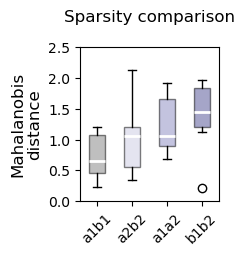

In [164]:
# Sample data
data = [d_a1b1,d_a2b2,d_a1a2,d_b1b2]
labels = ['a1b1','a2b2','a1a2','b1b2']
colors = ['gray', '#CACAE3','#8888C0', '#4D4D93']

# Create the box plot
plt.figure(figsize=(1.8,2))
boxplot = plt.boxplot(data, patch_artist=True)

# Set the colors and transparency for the boxes
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.5)  # Set transparency level

# Change the color of the median lines
for median in boxplot['medians']:
    median.set_color('white')  # Change this to your preferred color
    median.set_linewidth(2)    # Optionally adjust the line width

# Add horizontal and vertical lines
# plt.axhline(0.5, color='blue', linestyle='--', alpha=0.2)
# plt.axvline(1.5, color='k', linestyle='--', alpha=0.2)

# Add titles and labels
plt.title('Sparsity comparison\n')
plt.ylabel('Mahalanobis\ndistance', fontsize=12)
plt.ylim(0,2.5)
plt.xticks([1, 2,3,4], labels)
plt.xticks(rotation=45)

# Save the figure
plt.savefig('C:\\Users\\ebukina\\Desktop\\eva\\results\\models_evening\\distances_boxplots.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

## a/a/a b/b/b

In [4]:
s = [21,22]
m = ['3C290','3C290']

In [7]:
acc12 = []
pval12 = []

acc23 = []
pval23 = []

acc13 = []
pval13 = []



for i in range(len(s)):
    mouse = m[i]
    Session = s[i]
    with open(f'C:\\Users\\ebukina\\Desktop\\eva\\results\\aaa_bbb\\{mouse}_S{Session}_classifiers_results.pkl', 'rb') as f:
        classifiers_results = pickle.load(f)

        acc12.append(classifiers_results['svm']['acc12'])
        pval12.append(classifiers_results['svm']['pval12'])

        acc13.append(classifiers_results['svm']['acc13'])
        pval13.append(classifiers_results['svm']['pval13'])

        acc23.append(classifiers_results['svm']['acc23'])
        pval23.append(classifiers_results['svm']['pval23'])

In [9]:
acc12 = np.array(acc12)
pval12 = np.array(pval12)

acc13 = np.array(acc13)
pval13 = np.array(pval13)

acc23 = np.array(acc23)
pval23 = np.array(pval23)

In [33]:
acc12.shape

(2,)

In [13]:
acc_all = np.zeros((2,3))
acc_all[:,0]=acc12
acc_all[:,2]=acc13
acc_all[:,1]=acc23
acc_all.shape

(2, 3)

In [18]:
blue_orange = ['#1F77B4', '#FF8113']

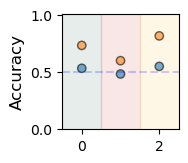

In [33]:
plt.figure(figsize=(1.5,1.5))

# Add horizontal and vertical lines
plt.axhline(0.5, color='blue', linestyle='--', alpha=0.2)
plt.axvspan(-0.5,0.5, color='#588c7e', alpha=0.15)
plt.axvspan(0.5,1.5, color='#d96459', alpha=0.15)
plt.axvspan(1.5,2.5, color='#ffcc5c', alpha=0.15)

plt.scatter(np.zeros(len(acc_all)), acc_all[:,0], c= blue_orange,alpha=0.6, edgecolors='k', linewidth=1, marker='o')
plt.scatter(np.zeros(len(acc_all))+1, acc_all[:,1], c= blue_orange,alpha=0.6, edgecolors='k', linewidth=1, marker='o')
plt.scatter(np.zeros(len(acc_all))+2, acc_all[:,2], c= blue_orange,alpha=0.6, edgecolors='k', linewidth=1, marker='o')

plt.ylim(0.0,1.01)
plt.xlim(-0.5, 2.5)

plt.ylabel('Accuracy', fontsize=12)

plt.tight_layout
plt.savefig(f'C:\\Users\\ebukina\\Desktop\\eva\\results\\aaa_bbb\\acc_all.png', dpi=300, bbox_inches='tight')
plt.show()

In [24]:
pval_all = np.zeros((2,3))
pval_all[:,0]=pval12
pval_all[:,2]=pval13
pval_all[:,1]=pval23
pval_all.shape

(2, 3)

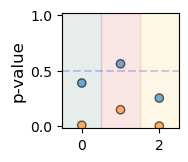

In [34]:
plt.figure(figsize=(1.5,1.5))

# Add horizontal and vertical lines
plt.axhline(0.5, color='blue', linestyle='--', alpha=0.2)
plt.axvspan(-0.5,0.5, color='#588c7e', alpha=0.15)
plt.axvspan(0.5,1.5, color='#d96459', alpha=0.15)
plt.axvspan(1.5,2.5, color='#ffcc5c', alpha=0.15)

plt.scatter(np.zeros(len(pval_all)), pval_all[:,0], c= blue_orange,alpha=0.6, edgecolors='k', linewidth=1, marker='o')
plt.scatter(np.zeros(len(pval_all))+1, pval_all[:,1], c= blue_orange,alpha=0.6, edgecolors='k', linewidth=1, marker='o')
plt.scatter(np.zeros(len(pval_all))+2, pval_all[:,2], c= blue_orange,alpha=0.6, edgecolors='k', linewidth=1, marker='o')

plt.ylim(-0.02,1.02)
plt.xlim(-0.5, 2.5)

plt.yticks([0.0,0.5,1.0]) 

plt.ylabel('p-value', fontsize=12)

plt.tight_layout
plt.savefig(f'C:\\Users\\ebukina\\Desktop\\eva\\results\\aaa_bbb\\pval_all.png', dpi=300, bbox_inches='tight')
plt.show()

additional anal

In [65]:
s = [45,46,11,13,14,19,20]
m = ['3C280','3C280','3C290','3C290','3C290','3C290','3C290']
seq = ['bac', 'abc', 'bac', 'bac', 'abc', 'bac','bac']

In [66]:
acc12 = []
pval12 = []

acc23 = []
pval23 = []

acc13 = []
pval13 = []

for i in range(len(s)):
    mouse = m[i]
    Session = s[i]
    with open(f'C:\\Users\\ebukina\\Desktop\\eva\\results\\aaa_bbb\\{mouse}_S{Session}_classifiers_results.pkl', 'rb') as f:
        classifiers_results = pickle.load(f)

        if seq[i]=='abc':
            acc12.append(classifiers_results['svm']['accab'])
            pval12.append(classifiers_results['svm']['pvalab'])

            acc23.append(classifiers_results['svm']['accbc'])
            pval23.append(classifiers_results['svm']['pvalbc'])

            acc13.append(classifiers_results['svm']['accac'])
            pval13.append(classifiers_results['svm']['pvalac'])
        else:
            acc12.append(classifiers_results['svm']['accab'])
            pval12.append(classifiers_results['svm']['pvalab'])

            acc23.append(classifiers_results['svm']['accac'])
            pval23.append(classifiers_results['svm']['pvalac'])

            acc13.append(classifiers_results['svm']['accbc'])
            pval13.append(classifiers_results['svm']['pvalbc'])


            

In [67]:
acc12 = np.array(acc12)
pval12 = np.array(pval12)

acc13 = np.array(acc13)
pval13 = np.array(pval13)

acc23 = np.array(acc23)
pval23 = np.array(pval23)

In [68]:
# took from matrices manually
a_23acc = 0.62
a_13acc = 0.82
a_12acc =0.67
b_23acc = 0.55
b_13acc = 0.48
b_12acc = 0.55

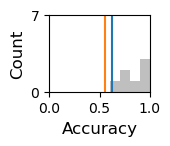

In [101]:
plt.figure(figsize=(1.3,1.0))
bin_edges = np.arange(np.min(acc23), np.max(acc23)+0.1, 0.1)
plt.hist(acc23, alpha=0.5, bins=bin_edges, color='#808080')
plt.ylim(0,7)
plt.xlim(0,1)
plt.axvline(a_23acc,color='#1F77B4')
plt.axvline(b_23acc,color='#FF8113')
plt.xlabel('Accuracy',  fontsize=12)
plt.ylabel('Count',  fontsize=12)
plt.yticks([0,7])
plt.tight_layout
plt.savefig(f'C:\\Users\\ebukina\\Desktop\\eva\\results\\aaa_bbb\\acc23_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

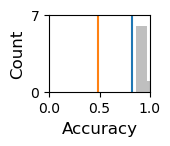

In [99]:
plt.figure(figsize=(1.3,1.0))
bin_edges = np.arange(np.min(acc13), np.max(acc13)+0.1, 0.1)
plt.hist(acc13, alpha=0.5, bins=bin_edges, color='#808080')
plt.ylim(0,7)
plt.xlim(0,1)
plt.axvline(a_13acc,color='#1F77B4')
plt.axvline(b_13acc,color='#FF8113')
plt.xlabel('Accuracy',  fontsize=12)
plt.ylabel('Count',  fontsize=12)
plt.yticks([0,7])
plt.tight_layout
plt.savefig(f'C:\\Users\\ebukina\\Desktop\\eva\\results\\aaa_bbb\\acc13_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

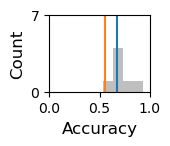

In [100]:
plt.figure(figsize=(1.3,1.0))
bin_edges = np.arange(np.min(acc12), np.max(acc12)+0.1, 0.1)
plt.hist(acc12, alpha=0.5, bins=bin_edges, color='#808080')
plt.ylim(0,7)
plt.xlim(0,1)
plt.axvline(a_12acc,color='#1F77B4')
plt.axvline(b_12acc,color='#FF8113')
plt.xlabel('Accuracy',  fontsize=12)
plt.ylabel('Count',  fontsize=12)
plt.yticks([0,7])
plt.tight_layout
plt.savefig(f'C:\\Users\\ebukina\\Desktop\\eva\\results\\aaa_bbb\\acc12_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

In [57]:
acc_all = np.zeros((len(s),3))
acc_all[:,0]=acc12
acc_all[:,2]=acc13
acc_all[:,1]=acc23
acc_all.shape

(7, 3)

In [58]:
acc_all

array([[0.68333333, 0.91666667, 0.93333333],
       [0.63333333, 0.86666667, 0.91666667],
       [0.91666667, 0.78333333, 0.95      ],
       [0.65      , 0.96666667, 0.93333333],
       [0.53333333, 0.93333333, 0.86666667],
       [0.65      , 0.78333333, 0.96666667],
       [0.73333333, 0.6       , 0.88333333]])

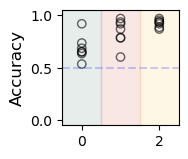

In [70]:
plt.figure(figsize=(1.5,1.5))

# Add horizontal and vertical lines
plt.axhline(0.5, color='blue', linestyle='--', alpha=0.2)
plt.axvspan(-0.5,0.5, color='#588c7e', alpha=0.15)
plt.axvspan(0.5,1.5, color='#d96459', alpha=0.15)
plt.axvspan(1.5,2.5, color='#ffcc5c', alpha=0.15)

plt.scatter(np.zeros(len(acc_all)), acc_all[:,0], c=[],alpha=0.6, edgecolors='k', linewidth=1, marker='o')
plt.scatter(np.zeros(len(acc_all))+1, acc_all[:,1], c= [],alpha=0.6, edgecolors='k', linewidth=1, marker='o')
plt.scatter(np.zeros(len(acc_all))+2, acc_all[:,2], c= [],alpha=0.6, edgecolors='k', linewidth=1, marker='o')

plt.ylim(-0.05,1.05)
plt.xlim(-0.5, 2.5)

plt.ylabel('Accuracy', fontsize=12)

plt.tight_layout
plt.savefig(f'C:\\Users\\ebukina\\Desktop\\eva\\results\\aaa_bbb\\acc_all.png', dpi=300, bbox_inches='tight')
plt.show()

In [72]:

for i in range(3):
    # Kolmogorov-Smirnov Test
    stat, p = stats.kstest(acc_all[:,i], 'norm')
    if p > 0.05:
        print(f"Distr is normal, p = {p:.3f}")
    else:
        print(f"Dist is NOT normal, p = {p:.3f}")

Dist is NOT normal, p = 0.001
Dist is NOT normal, p = 0.000
Dist is NOT normal, p = 0.000


In [135]:
# Kruskal-Wallis test
h_statistic, p_value = stats.kruskal(acc_all[:,0], acc_all[:,1], acc_all[:,2])
if p_value > 0.05:
    print(f"No difference, p = {p_value:.3f}")
else:
    print(f"There is a difference, p = {p_value:.3f}")

NameError: name 'acc_all' is not defined

In [79]:
import pandas as pd
from scipy.stats import kruskal
import scikit_posthocs as sp

In [81]:
# Convert to a DataFrame in long format
df = pd.DataFrame(acc_all, columns=['12', '23', '13'])
df_long = pd.melt(df.reset_index(), id_vars=['index'], value_vars=['12', '23', '13'])
df_long.columns = ['index', 'group', 'value']

# Perform Kruskal-Wallis test
stat, p_value = kruskal(df['12'], df['23'], df['13'])
print(f"Kruskal-Wallis test result: H-statistic = {stat}, p-value = {p_value}")

# Check if the result is significant
if p_value < 0.05:
    print("There is a significant difference between the groups, performing Dunn's test...")

    # Perform Dunn's test
    dunn_test_result = sp.posthoc_dunn(df_long, val_col='value', group_col='group', p_adjust='bonferroni')
    print(dunn_test_result)
else:
    print("No significant differences found between groups, no need for post hoc test.")

Kruskal-Wallis test result: H-statistic = 9.239962651727367, p-value = 0.00985298005536196
There is a significant difference between the groups, performing Dunn's test...
          12        13        23
12  1.000000  0.007460  0.229305
13  0.007460  1.000000  0.630405
23  0.229305  0.630405  1.000000


In [82]:
dunn_test_result<0.05

,12,13,23
12,False,True,False
13,True,False,False
23,False,False,False


In [66]:
pval_all = np.zeros((len(s),3))
pval_all[:,0]=pval12
pval_all[:,2]=pval13
pval_all[:,1]=pval23
pval_all.shape

(7, 3)

In [73]:
for i in range(3):
    # Kolmogorov-Smirnov Test
    stat, p = stats.kstest(pval_all[:,i], 'norm')
    if p > 0.05:
        print(f"Distr is normal, p = {p:.3f}")
    else:
        print(f"Dist is NOT normal, p = {p:.3f}")

Dist is NOT normal, p = 0.038
Dist is NOT normal, p = 0.038
Dist is NOT normal, p = 0.038


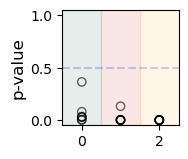

In [71]:
plt.figure(figsize=(1.5,1.5))

# Add horizontal and vertical lines
plt.axhline(0.5, color='blue', linestyle='--', alpha=0.2)
plt.axvspan(-0.5,0.5, color='#588c7e', alpha=0.15)
plt.axvspan(0.5,1.5, color='#d96459', alpha=0.15)
plt.axvspan(1.5,2.5, color='#ffcc5c', alpha=0.15)

plt.scatter(np.zeros(len(pval_all)), pval_all[:,0], c=[],alpha=0.6, edgecolors='k', linewidth=1, marker='o')
plt.scatter(np.zeros(len(pval_all))+1, pval_all[:,1], c= [],alpha=0.6, edgecolors='k', linewidth=1, marker='o')
plt.scatter(np.zeros(len(pval_all))+2, pval_all[:,2], c= [],alpha=0.6, edgecolors='k', linewidth=1, marker='o')

plt.ylim(-0.05,1.05)
plt.xlim(-0.5, 2.5)

plt.ylabel('p-value', fontsize=12)

plt.tight_layout
plt.savefig(f'C:\\Users\\ebukina\\Desktop\\eva\\results\\aaa_bbb\\pval_all.png', dpi=300, bbox_inches='tight')
plt.show()

control

In [82]:
accab = []
pvalab = []

accbc = []
pvalbc = []

accac = []
pvalac = []

for i in range(len(s)):
    mouse = m[i]
    Session = s[i]
    with open(f'C:\\Users\\ebukina\\Desktop\\eva\\results\\aaa_bbb\\{mouse}_S{Session}_classifiers_results.pkl', 'rb') as f:
        classifiers_results = pickle.load(f)
 
        accab.append(classifiers_results['svm']['accab'])
        pvalab.append(classifiers_results['svm']['pvalab'])

        accbc.append(classifiers_results['svm']['accbc'])
        pvalbc.append(classifiers_results['svm']['pvalbc'])

        accac.append(classifiers_results['svm']['accac'])
        pvalac.append(classifiers_results['svm']['pvalac'])
   

In [83]:
accab = np.array(accab)
pvalab = np.array(pvalab)

accbc = np.array(accbc)
pvalbc = np.array(pvalbc)

accac = np.array(accac)
pvalac = np.array(pvalac)

In [84]:
acc_all = np.zeros((3,len(s)))
acc_all[0,:]=accab
acc_all[2,:]=accbc
acc_all[1,:]=accac
acc_all.shape

(3, 7)

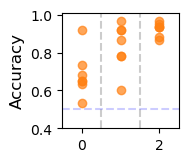

In [85]:
plt.figure(figsize=(1.5,1.5))

# Add horizontal and vertical lines
plt.axhline(0.5, color='blue', linestyle='--', alpha=0.2)
plt.axvline(1.5, color='k', linestyle='--', alpha=0.2)
plt.axvline(0.5, color='k', linestyle='--', alpha=0.2)

for ses in range(len(s)):
    plt.plot(acc_all[:,ses], 'o', alpha=0.7, color='#FF8113')

plt.ylim(0.4,1.01)
plt.xlim(-0.5, 2.5)

plt.ylabel('Accuracy', fontsize=12)

plt.tight_layout
plt.savefig(f'C:\\Users\\ebukina\\Desktop\\eva\\results\\aaa_bbb\\acc_all.png', dpi=300, bbox_inches='tight')
plt.show()